In [1]:
from IPython.core.display import HTML
HTML("""
<div class="alert">
  <p>Do social and economic factors such as Free School Meals, Ethnicity and English as a Second Language influence the performance of girls in England's National Curriculum tests from ages 8 - 16?</p>
</div>

<style>
.alert {
  padding: 20px;
  background-color: #ADD8E6;
  color: darkblue;
  font-size: 25px;
  margin-bottom: 15px;
  font-type: bold;
  
}
</style>
""")



# **1. IMPORT KEY LIBRARIES**

 Importing the modules in order to import, clean and visual the data


In [2]:
import pandas as pd # a software library for python data manipulation and analysis
import numpy as np # a software library for adding support for large multidimensional arrays
import matplotlib.pyplot as plt # a software plotting library for adding visualisations
import warnings
warnings.filterwarnings('ignore')

# __2. SET CONSISTENT COLOURS__

* To provide consistentcy throughout the notebook we have set consistent colours to use in the visualisations for each characteristic.
* Defining them here at the start will streamline our code later in the notebook.
* We have selected accessible colour palettes, so anyone who has a sight imparement (e.g., colour blindness) can look at our visualisations.
* Accessible colour chart: http://www.sussex.ac.uk/tel/resource/tel_website/accessiblecontrast/?q=FFFFFF~003b49~1d4289~94a596~e56db1~d3273e~00bfb2~d6d2c4~ffc845~dc582a~41b6e6~1b365d~be84a3~5d3754~7da1c4~f2c75c~d0d3d4~007a78~000000 

In [3]:
# Setting colours for free school meals
colours_fsm = ['#1b365d', '#ffc845']

# Setting colours for first language
colours_lang = ['#003b49', '#00bfb2', '#e56db1']

# Setting colours for ethnicity
colours_ethnic_major = ['#003b49', '#00bfb2', '#e56db1', '#41b6e6', '#ffc845', '#d6d2c4']


#  **3. YEAR 4 MATHS TEST DATA**

![picture](multiplication_image.jpeg)

## 3.1. FREE SCHOOL MEALS - IMPORT AND ANALYSIS (YR4)



### 3.1.1 Import clean CSV file


In [4]:
try:
    fsm_yr4_df = pd.read_csv('fsm_yr4_df.csv')
    print('Sucessfully connected!')
except FileNotFoundError:
    print("File not found. Please check the file path.")

    

Sucessfully connected!


### 3.1.2 Statisical Analysis

> Comparing the mean score of the two groups





In [5]:
# Finding the mean score (between 0 and 25) achieved in the year 4 maths test by pupils who are in reciept of Free School Meals
# and the mean score achieved by pupils who are NOT in receipt of Free School Meals - Jade

# Calling the column mtc_average_score to show the average. Using the groupby pandas function.
av_scores_fsm = fsm_yr4_df.groupby('characteristic')['mtc_average_score'].sum()
av_scores_fsm

characteristic
FSM eligible                    17.5
Not known to be FSM eligible    20.3
Name: mtc_average_score, dtype: float64

* We can see that the average score achieved by pupils receiving free school meals is 17.5 and the average score achieved by students NOT recieving free school meals is 20.3.



> Comparing the proportion of pupils working below the expected standard in each group



In [6]:
# Using the column 't_mtc_working_below' to compare the percentage of pupils achieving a score
# below the expected standard - Jade

# Calculate the percentage of pupils working below the expected standard
fsm_yr4_df['below_stand_pc'] = (fsm_yr4_df['t_mtc_working_below'] / fsm_yr4_df['t_mtc_pupils_completed_check']) * 100

# Group by 'characteristic' column and calculate the sum of 'below_stand_pc' column (round to 2dp)
below_standard_fsm = fsm_yr4_df.groupby('characteristic')['below_stand_pc'].sum()
below_standard_fsm = below_standard_fsm.round(2)

print('Percentage of pupils working below standard (%): \n', below_standard_fsm)

Percentage of pupils working below standard (%): 
 characteristic
FSM eligible                    3.63
Not known to be FSM eligible    1.32
Name: below_stand_pc, dtype: float64


* We can see that in 2022 a higher percentage of pupils on free school meals were working below the expected standard compared to pupils not on free school meals.
* 3.63% of free school meals pupils are working below standard and 1.32% of non free school meals pupils are working below standard.




> Comparing the proportion of pupils achieving full marks between the two groups




In [7]:
# We are also interested in whhich group has the highest percentage of high achieving pupils.
# To do this we can compare the percentage of pupils achieving full marks (using column 't_mtc_scored_25') - Jade

# Calculate the percentage of pupils working below the expected standard
fsm_yr4_df['full_marks_pc'] = (fsm_yr4_df['t_mtc_scored_25'] / fsm_yr4_df['t_mtc_pupils_completed_check']) * 100

# Group by 'characteristic' column and calculate the sum of 'below_stand_pc' column (round to 2dp)
full_marks_fsm = fsm_yr4_df.groupby('characteristic')['full_marks_pc'].sum()
full_marks_fsm = full_marks_fsm.round(2)

print('Percentage of pupils achieving full marks (%): \n', full_marks_fsm)


Percentage of pupils achieving full marks (%): 
 characteristic
FSM eligible                    17.87
Not known to be FSM eligible    28.47
Name: full_marks_pc, dtype: float64


* We can see there is a significant difference between the percentage of pupils in the two groups who achieve full marks in the test.
* 17.87% of pupils on free school meals achieved full marks, whereas 28.47% of non free school meals pupils achieved full marks.
* This analysis indicates that not only do pupils on free school meals underperform their peers on an average basis, they are also significantly less likely to be a high achiever and are more likely to underperform.

### 3.1.3 Visual Analysis

* Following on from our initial analysis, we now show our results visually.
* Using the MatPlotLib library to create a 3x1 subplot showing mean score, % of pupils working below standard and the percentage of pupils achieving top marks in each group.

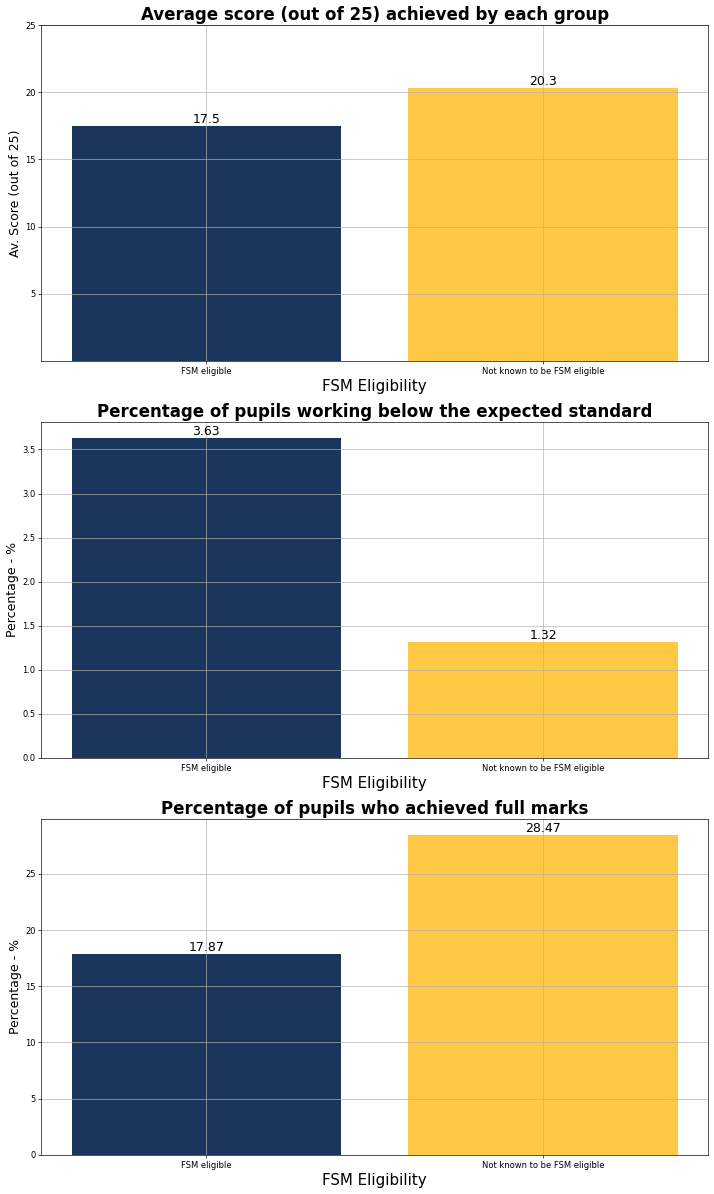

In [8]:
# Allows us to change the size of the figure
from matplotlib.pyplot import figure

# Creating a function that we can reuse to add labels to our bar chart
def add_labels(rectangles, values):
    for i, rect in enumerate(rectangles):
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width() / 2, height, values[i], ha='center', va='bottom', fontsize=15)

# Making a resuable function that we can use to make the same set of sub plots for the fsm, ethnicity and language characteristics
def create_subplot_3x1(data1, data2, data3, x_label, y_labels, colours):
    # Changing the size of the figure to make it easier to read
    figure(figsize=(12, 20), dpi=60)

    # Making the sub plot for average score
    plt.subplot(3, 1, 1)
    bar_plot1 = plt.bar(data1.index, data1.values, color=colours)
    plt.xlabel(x_label, fontsize=18)
    plt.yticks([5, 10, 15, 20, 25])
    plt.ylabel(y_labels[0], fontsize=15)
    plt.title('Average score (out of 25) achieved by each group', fontsize=20, weight = 'bold')
    plt.grid()
    # Using our function we made
    add_labels(bar_plot1, data1.values)

    # Making the subplot for below standard pupils
    plt.subplot(3, 1, 2)
    bar_plot2 = plt.bar(data2.index, data2.values, color=colours)
    plt.xlabel(x_label, fontsize=18)
    plt.ylabel(y_labels[1], fontsize=15)
    plt.title('Percentage of pupils working below the expected standard', fontsize=20, weight = 'bold')
    plt.grid()
    # Using the function we made
    add_labels(bar_plot2, data2.values)

    # Making the subplot for full marks pupils
    plt.subplot(3, 1, 3)
    bar_plot3 = plt.bar(data3.index, data3.values, color=colours)
    plt.xlabel(x_label, fontsize=18)
    plt.ylabel(y_labels[2], fontsize=15)
    plt.grid()
    plt.title('Percentage of pupils who achieved full marks', fontsize=20, weight = 'bold')
    # Using the function for labels we made
    add_labels(bar_plot3, data3.values)
    plt.tight_layout()
    plt.show()


# Using the new function to show the range of scores achieved by fsm and non-fsm pupils
create_subplot_3x1(av_scores_fsm, below_standard_fsm, full_marks_fsm, 'FSM Eligibility', ['Av. Score (out of 25)', 'Percentage - %', 'Percentage - %'],
    colours_fsm)


* This set of sub plots allows us to see the difference in achievement between the two groups in a much clearer way than the numerical statistics previously calculated allow.
* Girls who are on Free School Meals on average achieve a lower score in the year 4 maths test. They are also more likely to be working below the expected standard and are less likely to achieve full marks.


> Creating a bar plot showing the distribution of scores for the two groups.



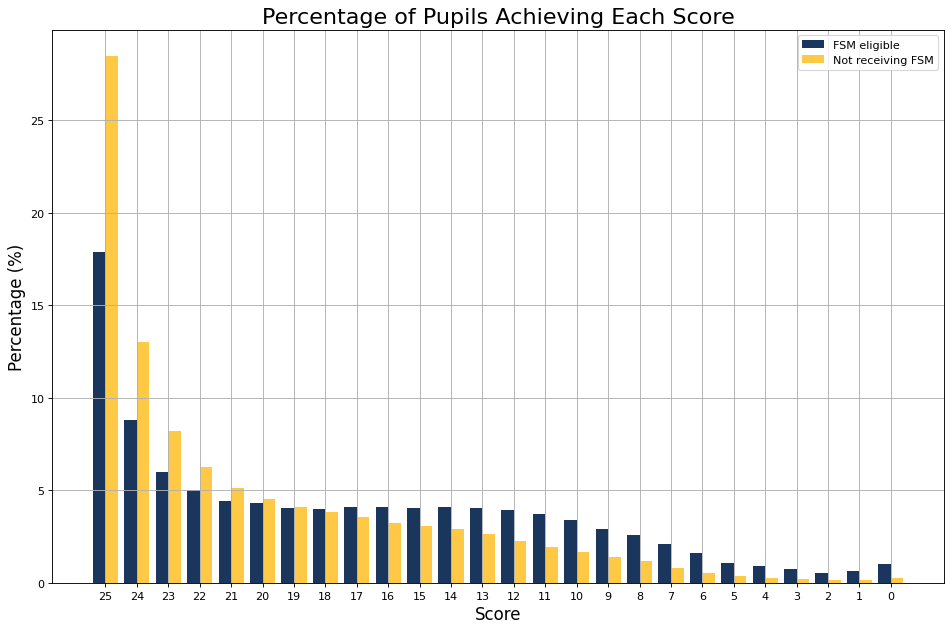

In [9]:
# Adjusting the size of the figure
figure(figsize=(12,8), dpi=80)

# Assigning the columns we can to a variable
score_columns = ['t_mtc_scored_25', 't_mtc_scored_24', 't_mtc_scored_23', 't_mtc_scored_22', 't_mtc_scored_21',
                 't_mtc_scored_20', 't_mtc_scored_19', 't_mtc_scored_18', 't_mtc_scored_17', 't_mtc_scored_16',
                 't_mtc_scored_15', 't_mtc_scored_14', 't_mtc_scored_13', 't_mtc_scored_12', 't_mtc_scored_11',
                 't_mtc_scored_10', 't_mtc_scored_9', 't_mtc_scored_8', 't_mtc_scored_7', 't_mtc_scored_6',
                 't_mtc_scored_5', 't_mtc_scored_4', 't_mtc_scored_3', 't_mtc_scored_2', 't_mtc_scored_1', 't_mtc_scored_0']

# Calculating the percentage of pupils who achieved each score
grouped_data = fsm_yr4_df.groupby('characteristic')[score_columns].sum()
total_pupils = fsm_yr4_df.groupby('characteristic')['t_mtc_pupils_completed_check'].sum()
percentage_data = (grouped_data / np.array(total_pupils)[:, np.newaxis]) * 100

# Define the desired x-axis tick values (to make more user friendly and easier to interpret)
x_ticks = [25, 24, 23, 22, 21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0]
x_tick_positions = np.arange(len(x_ticks))

# Plot bar chart for FSM eligible and Not known to be FSM eligible side by side
plt.bar(x_tick_positions - 0.2, percentage_data.loc['FSM eligible'], width=0.4, label='FSM eligible', color=colours_fsm[0])
plt.bar(x_tick_positions + 0.2, percentage_data.loc['Not known to be FSM eligible'], width=0.4, label='Not receiving FSM', color=colours_fsm[1])
plt.xlabel('Score', size =15)
plt.xticks(x_tick_positions, x_ticks)
plt.ylabel('Percentage (%)', size =15)
plt.title('Percentage of Pupils Achieving Each Score', size =20)
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()


* The set of two bar charts above shows us an interesting trend across the two groups. In the first sub plot, which shows the percentage of pupils on free school meals achieving each score, we can see that the percentage achieving each score is much more equally distributed when compared to the non free school meals pupils (apart from the top score).
* The most common score within both groups is 25 out of 25, although a higher percentage of those NOT receiving free school meals achieve this score compared to the group that do recieve free school meals. 

### 3.1.4 Summary
* Going back to our original research question - our analysis shows that whether or not a girl is on Free School Meals does have an impact on her attainment in the year 4 maths test (age 8-9).
* Girls on FSM tend to underperform and are less likely to achieve full marks on the test.
* We can therefore use our analysis to argue with decision makers in the education field (for example Department For Education) that more funding needs to be put in place before age 8-9 to help girls recieving Free School Meals achieve their full potential.

## 3.2 ETHNICITY - IMPORT AND ANALYSIS (YR4)




### 3.2.1 Import clean csv file

In [10]:
try:
    ethnicity_yr4_df = pd.read_csv('ethnicity_yr4_df.csv')
    print('Sucessfully connected!')
except FileNotFoundError:
    print("File not found. Please check the file path.")

    

Sucessfully connected!


### 3.2.2 Average scores of the six ethnic majors






> Finding the mean score (between 0 and 25) achieved in the year 4 maths test by ethnic major



In [11]:
# Group by 'characteristic' column and use 'mtc_average_score' to get the average
av_scores_ethnicity_yr4 = ethnicity_yr4_df.groupby('characteristic')['mtc_average_score'].sum()

In [12]:
# View the average score by ethnic group
av_scores_ethnicity_yr4

characteristic
Any other ethnic group    20.3
Asian                     21.7
Black                     21.0
Mixed                     19.9
Unclassified              18.6
White                     19.0
Name: mtc_average_score, dtype: float64


> Summary of the mean score (between 0 and 25) achieved in the year 4 maths test by ethnic major



- The ethnic major with the highest average score is *Asian* at 21.7
- The ethnic major with the lowest average score is *Unclassified* at 18.6

### 3.2.3 Below average scores of the six ethnic majors


> Find the percentage of pupils in each ethnic major achieving a score below the expected standard



In [13]:
# Create a new column for the percentage of pupils who achieved a score below the expected standard
# and calculate that percentage
ethnicity_yr4_df['below_stand_pc'] = (ethnicity_yr4_df['t_mtc_working_below'] / ethnicity_yr4_df['t_mtc_pupils_completed_check']) * 100

In [14]:
# Group the below expected standard score column by 'characteristic' column
# and calculate the sum of 'below_stand_pc' column
# to get the percentage of pupils below the expected standard score by ethnic major
below_standard_ethnicity_yr4 = ethnicity_yr4_df.groupby('characteristic')['below_stand_pc'].sum()

In [15]:
# Round the below expected standard by ethnic major by 2 decimal points
below_standard_ethnicity_yr4 = below_standard_ethnicity_yr4.round(2)

In [16]:
# Viewing the below standard percentage by ethnic major
print('Percentage of pupils working below standard (%): \n \n', below_standard_ethnicity_yr4)

Percentage of pupils working below standard (%): 
 
 characteristic
Any other ethnic group    2.92
Asian                     1.48
Black                     1.89
Mixed                     1.71
Unclassified              3.05
White                     1.95
Name: below_stand_pc, dtype: float64



> Summary of the percentage of pupils in each ethnic major achieving a score below the expected standard



- The ethnic major with the highest percentage of pupils working below standard is *Unclassified* at 3.05
- The ethnic major with the lowest percentage of pupils working below standard is *Asian* at 1.48

### 3.2.4 Highest scores of the six ethnic majors

In [17]:
# Create a new column for the percentage of pupils who achieved the highest score
# and calculate the that percentage
ethnicity_yr4_df['full_marks_pc'] = (ethnicity_yr4_df['t_mtc_scored_25'] / ethnicity_yr4_df['t_mtc_pupils_completed_check']) * 100

In [18]:
# View the new column of the highest score
ethnicity_yr4_df['full_marks_pc']

0    30.974251
1    40.781769
2    34.855545
3    28.277535
4    21.163922
5    22.182216
Name: full_marks_pc, dtype: float64

In [19]:
# Group the highest score column by 'characteristic' column
# and calculate the sum of 'full_marks_pc' column
# to get the percentage of pupils with the highest score by ethnic major
full_marks_ethnicity_yr4 = ethnicity_yr4_df.groupby('characteristic')['full_marks_pc'].sum()

In [20]:
# Round the highest score by ethnic major to 2 decimal points
full_marks_ethnicity_yr4 = full_marks_ethnicity_yr4.round(2)

In [21]:
# View the highest score by ethnic major
print('Percentage of pupils achieving the highest score (%): \n \n', full_marks_ethnicity_yr4)

Percentage of pupils achieving the highest score (%): 
 
 characteristic
Any other ethnic group    30.97
Asian                     40.78
Black                     34.86
Mixed                     28.28
Unclassified              21.16
White                     22.18
Name: full_marks_pc, dtype: float64



> Summary of the percentage of pupils in each ethnic major with the highest score



- The highest percentage of pupils achieving full marks by ethnic major is *Asian* at 40.78
- The lowest percentage of pupils achieving full marks by ethnic major is *Unclassified* at 21.16

### 3.2.4 Highest scores of the six ethnic majors

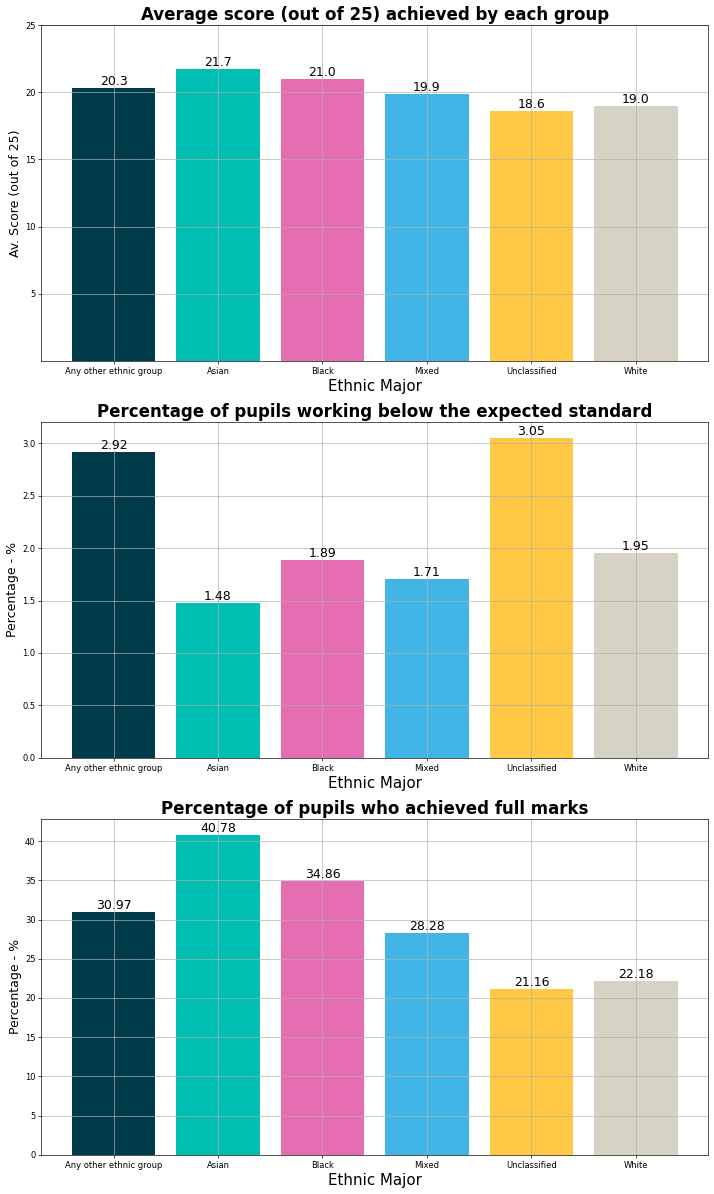

In [22]:
# Using the function we made earlier (in the fsm section) to show the results on a figure
create_subplot_3x1(av_scores_ethnicity_yr4, below_standard_ethnicity_yr4, full_marks_ethnicity_yr4, 'Ethnic Major', ['Av. Score (out of 25)', 'Percentage - %', 'Percentage - %'],
    colours_ethnic_major)

* This chart helps us to see in a nice visual way the differences between the groups.
* Asian students are the group with the highest average score. They are also the group that is most likely to achieve full marks. We can therefore conclude that the Asian group is the strongest performing group.
* The Unclassified group is the group with the lowest average score. They are also least likely to achieve full marks.
* The Other group is a close second on the working below expectations figure. This is a bit of an outlier as the group has the third highest average score and the third highest proportion who achieved full marks. We believe this group has the widest range of scores, perhaps because it is made up of pupils from lots of different backgrounds wheras the other catergories contain pupils from the same ethnic group.

## 3.3 ENGLISH AS A FIRST LANGUAGE - IMPORT AND ANALYSIS (YR4)









### 3.3.1. Import clean CSV file

In [23]:
try:
    lang_yr4_df = pd.read_csv('lang_yr4_df.csv')
    print('Sucessfully connected!')
except FileNotFoundError:
    print("File not found. Please check the file path.")

    

Sucessfully connected!


### 3.3.2 Average scores of EAL

In [24]:
# Group by 'characteristic' column and use 'mtc_average_score' to get the average
av_scores_lang_yr4 = lang_yr4_df.groupby('characteristic')['mtc_average_score'].sum()


In [25]:
# View the average score by ethnic group
av_scores_lang_yr4

characteristic
First language unclassified                   17.7
Known or believed to be English               19.2
Known or believed to be other than English    20.9
Name: mtc_average_score, dtype: float64

Summary of the mean score (between 0 and 25) achieved in the year 4 maths test by language.

The first language with the highest average score is Known 
or believed to be other than English at 20.9

The first language with the lowest average score is Unclassified at 17.7

### 3.3.3 EAL students below expected standard

In [26]:
# Create a new column for the percentage of pupils who achieved a score below the expected standard
# and calculate that percentage
lang_yr4_df['below_stand_pc'] = (lang_yr4_df['t_mtc_working_below'] / lang_yr4_df['t_mtc_pupils_completed_check']) * 100

In [27]:
# Group the below expected standard score column by 'characteristic' column
# and calculate the sum of 'below_stand_pc' column
# to get the percentage of pupils below the expected standard score by language
below_standard_lang_yr4 = lang_yr4_df.groupby('characteristic')['below_stand_pc'].sum()

In [28]:
# Round the below expected standard by first language by 2 decimal points
below_standard_lang_yr4 = below_standard_lang_yr4.round(2)

In [29]:
# Viewing the below standard percentage by language
print('Percentage of pupils working below standard (%): \n \n', below_standard_lang_yr4)

Percentage of pupils working below standard (%): 
 
 characteristic
First language unclassified                   4.18
Known or believed to be English               1.92
Known or believed to be other than English    1.82
Name: below_stand_pc, dtype: float64


Summary of the percentage of pupils in each language group achieving a score below the expected standard.

The first language with the highest percentage of pupils working below standard is Unclassified at 4.18.

The first language with the lowest percentage of pupils working below standard is Known or believed to be other than English at 1.82.

### 3.3.4 EAL highest scores


Finding the percentage of pupils in each first language with the highest score

In [30]:
# Create a new column for the percentage of pupils who achieved the highest score
# and calculate the that percentage
lang_yr4_df['full_marks_pc'] = (lang_yr4_df['t_mtc_scored_25'] / lang_yr4_df['t_mtc_pupils_completed_check']) * 100

In [31]:
# View the new column of the highest score
lang_yr4_df['full_marks_pc']

0    18.229801
1    23.251589
2    35.265886
Name: full_marks_pc, dtype: float64

In [32]:
# Group the highest score column by 'characteristic' column
# and calculate the sum of 'full_marks_pc' column
# to get the percentage of pupils with the highest score by first language
full_marks_lang_yr4 = lang_yr4_df.groupby('characteristic')['full_marks_pc'].sum()

In [33]:
# Round the highest score by first language to 2 decimal points
full_marks_lang_yr4 = full_marks_lang_yr4.round(2)

In [34]:
# View the highest score by first language
print('Percentage of pupils achieving the highest score (%): \n \n', full_marks_lang_yr4)

Percentage of pupils achieving the highest score (%): 
 
 characteristic
First language unclassified                   18.23
Known or believed to be English               23.25
Known or believed to be other than English    35.27
Name: full_marks_pc, dtype: float64


Summary of the percentage of pupils in each language group achieving a score below the expected standard.

The first language with the highest percentage of pupils working below standard is Unclassified at 4.18.

The first language with the lowest percentage of pupils working below standard is Known or believed to be other than English at 1.82.

### 3.3.5 Visual Analysis

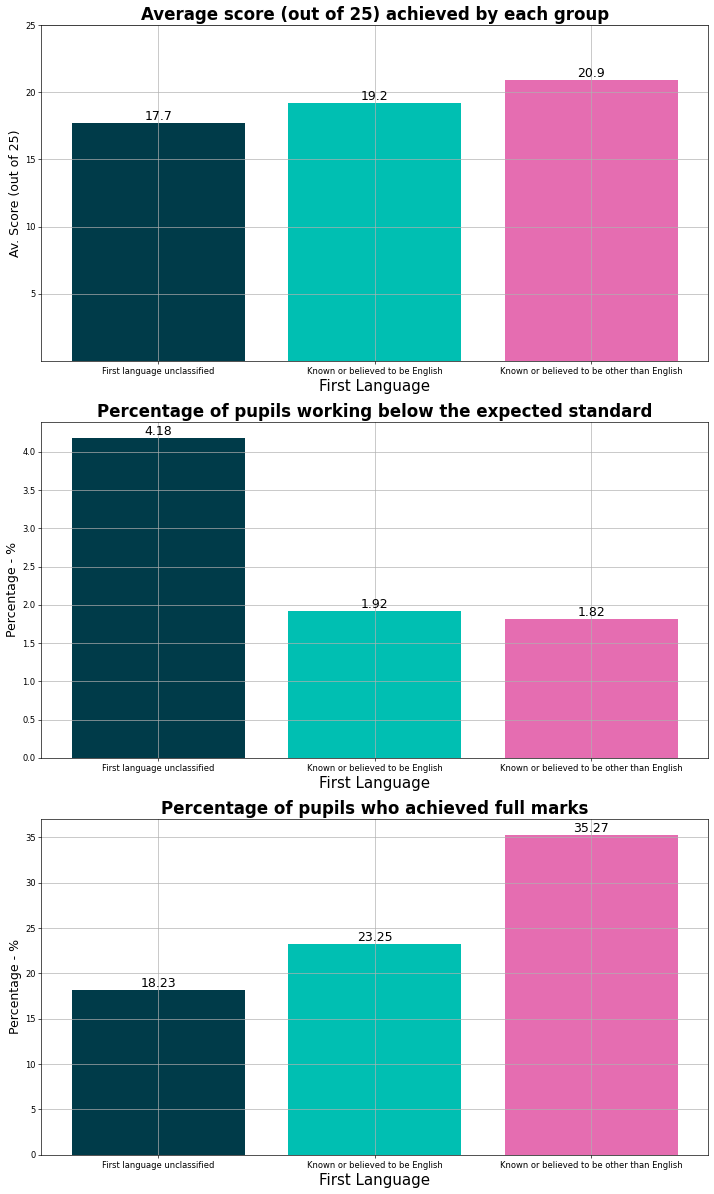

In [35]:
# Using the function we made earlier (in the fsm section) to show the results for first language on a figure
create_subplot_3x1(av_scores_lang_yr4, below_standard_lang_yr4, full_marks_lang_yr4, 'First Language', ['Av. Score (out of 25)', 'Percentage - %', 'Percentage - %'],
    colours_lang)

* We can clearly see from the graph that pupils whose language is 'unclassified' are most likely to underachieve and have the lowest average score.
* Pupils whose first language is not English are more likely to achieve full marks and have the highest average score.

### 3.3.6 Distribution of scores for EAL

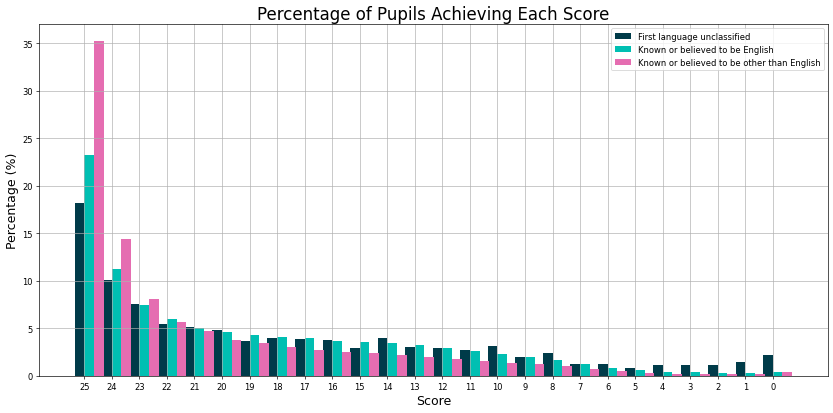

In [36]:
# Adjusting the size of the figure
figure(figsize=(14, 7), dpi=60)

# Assigning the columns we can to a variable
score_columns = ['t_mtc_scored_25', 't_mtc_scored_24', 't_mtc_scored_23', 't_mtc_scored_22', 't_mtc_scored_21',
                 't_mtc_scored_20', 't_mtc_scored_19', 't_mtc_scored_18', 't_mtc_scored_17', 't_mtc_scored_16',
                 't_mtc_scored_15', 't_mtc_scored_14', 't_mtc_scored_13', 't_mtc_scored_12', 't_mtc_scored_11',
                 't_mtc_scored_10', 't_mtc_scored_9', 't_mtc_scored_8', 't_mtc_scored_7', 't_mtc_scored_6',
                 't_mtc_scored_5', 't_mtc_scored_4', 't_mtc_scored_3', 't_mtc_scored_2', 't_mtc_scored_1', 't_mtc_scored_0']

# Calculating the percentage of pupils who achieved each score
grouped_data = lang_yr4_df.groupby('characteristic')[score_columns].sum()
total_pupils = lang_yr4_df.groupby('characteristic')['t_mtc_pupils_completed_check'].sum()
percentage_data = (grouped_data / np.array(total_pupils)[:, np.newaxis]) * 100

# Define the desired x-axis tick values (to make more user-friendly and easier to interpret)
x_ticks = [25, 24, 23, 22, 21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0]
x_tick_positions = np.arange(len(x_ticks))

# Define the bar width
bar_width = 0.35

# Plot bar chart for FSM eligible and Not known to be FSM eligible side by side
plt.bar(x_tick_positions - bar_width / 2, percentage_data.loc['First language unclassified'], width=bar_width, label='First language unclassified', color=colours_lang[0])
plt.bar(x_tick_positions + bar_width / 2, percentage_data.loc['Known or believed to be English'], width=bar_width, label='Known or believed to be English', color=colours_lang[1])
plt.bar(x_tick_positions + 3 * bar_width / 2, percentage_data.loc['Known or believed to be other than English'], width=bar_width, label='Known or believed to be other than English', color=colours_lang[2])
plt.xlabel('Score', size=15)
plt.xticks(x_tick_positions, x_ticks)
plt.ylabel('Percentage (%)', size=15)
plt.title('Percentage of Pupils Achieving Each Score', size=20)
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()


* This graph shows us, again, pupils whose first language is not English are more likely to achieve top marks. 
* Pupils whose first language is unclassified are more likley to have the lowest scores.
* Pupils whose first language is English have scores that are more equally distributed across the middle range of scores.

### 3.3.5 Summary

Summary of the percentage of pupils in each first language group with the highest score.

The highest percentage of pupils achieving full marks by first language group is Known or Believed to be other than English at 35.27.

The lowest percentage of pupils achieving full marks by first language group is Unclassified at 18.23.

# **4. KEY STAGE 2 ATTAINMENT DATA**

![picture](test_image.jpeg)


## 4.1. FREE SCHOOL MEALS - IMPORT AND ANALYSIS (KS2)

### 4.1.1 Import Clean CSV file

In [37]:
try:
    fsm_ks2_df = pd.read_csv('fsm_ks2_df.csv')
    print('Sucessfully connected!')
except FileNotFoundError:
    print('File not found: Check file path')

fsm_ks2_df.head()

Sucessfully connected!


,time_period,characteristic_group,characteristic,gender,no_schools,t_rwm_eligible_pupils,t_rwm_met_expected_standard,t_rwm_met_higher_standard,t_read_eligible_pupils,t_read_met_expected_standard,...,pt_read_met_higher_standard,pt_read_not_achieved_expected_standard,pt_read_working_below_assessment,pt_read_absent,pt_read_unable_to_access_or_just_arrived,pt_read_unable_to_access,avg_read_scaled_score,avg_read_progress_score,avg_read_progress_score_upper_ci,avg_read_progress_score_lower_ci
0,201516,Free school meal status,FSM eligible,Girls,11463.0,44407.0,17392.0,841.0,44478.0,23738.0,...,10.0,42.0,5.0,0.0,0.6575,0.000000,100.0,0.530099,0.808257,0.251941
1,201516,Free school meal status,Not known to be FSM eligible,Girls,15340.0,242198.0,146634.0,16931.0,242377.0,176583.0,...,24.0,25.0,2.0,0.0,0.6575,0.000000,104.0,0.530099,0.808257,0.251941
2,201617,Free school meal status,FSM eligible,Girls,11560.0,44584.0,20997.0,1464.0,44657.0,26538.0,...,14.0,36.0,4.0,0.0,0.0000,0.080808,101.0,0.530099,0.808257,0.251941
3,201617,Free school meal status,Not known to be FSM eligible,Girls,15371.0,248575.0,169610.0,28397.0,248728.0,193309.0,...,30.0,20.0,2.0,0.0,0.0000,0.080808,105.0,0.530099,0.808257,0.251941
4,201718,Free school meal status,FSM eligible,Girls,11595.0,44213.0,22573.0,1924.0,44253.0,28790.0,...,18.0,30.0,4.0,0.0,0.0000,0.080808,103.0,0.530099,0.808257,0.251941


### 4.1.2 Statistical & Visual Analysis



>  Comparing the percentage of pupils who achieved the __expected standard__ across the two groups in the most recent academic year of data (2021-2022) in the following subjects:


* Maths
* Science
* Reading
* Grammar, punctuation and spelling


In [38]:
# Changing the size of the plot to make it easier to read
figure(figsize=(8,16), dpi=60)

# Filter the dataframe
filtered_df_fsm = fsm_ks2_df[(fsm_ks2_df['time_period'] == 202122)]

# Calculate the percentages for each group for each subject
filtered_df_fsm['maths_percentage'] = (filtered_df_fsm['t_mat_met_expected_standard'] / filtered_df_fsm['t_mat_eligible_pupils']) * 100
filtered_df_fsm['science_percentage'] = (filtered_df_fsm['t_scita_met_expected_standard'] / filtered_df_fsm['t_scita_eligible_pupils']) * 100
filtered_df_fsm['reading_percentage'] = (filtered_df_fsm['t_read_met_expected_standard'] / filtered_df_fsm['t_read_eligible_pupils']) * 100
filtered_df_fsm['grammar_percentage'] = (filtered_df_fsm['t_gps_met_expected_standard'] / filtered_df_fsm['t_gps_eligible_pupils']) * 100


<Figure size 480x960 with 0 Axes>

In [39]:
# Making a function we can resue for the other characteristics we are looking at.
def create_4x1_subplot(data, bar_colours):
    # Figure size
    plt.figure(figsize=(18, 18), dpi=60)
    
    # First subplot
    filtered_df = data[0]['filtered_df']
    value_column = data[0]['value_column']
    plt.subplot(4, 1, 1)
    plt.bar(filtered_df['characteristic'], filtered_df[value_column], color=bar_colours)
    plt.xlabel('Characteristic Group', fontsize=15)
    plt.ylabel('Percentage - %', fontsize=15)
    plt.title('Percentage of pupils who achieved the expected standard in maths (2021/22)', fontsize=20)
    plt.grid()
    
    # Second subplot
    filtered_df = data[1]['filtered_df']
    value_column = data[1]['value_column']
    plt.subplot(4, 1, 2)
    plt.bar(filtered_df['characteristic'], filtered_df[value_column], color=bar_colours)
    plt.xlabel('Characteristic Group', fontsize=15)
    plt.ylabel('Percentage - %', fontsize=15)
    plt.title('Percentage of pupils who achieved the expected standard in science (2021/22)', fontsize=20)
    plt.grid()
    
    # Third subplot
    filtered_df = data[2]['filtered_df']
    value_column = data[2]['value_column']
    plt.subplot(4, 1, 3)
    plt.bar(filtered_df['characteristic'], filtered_df[value_column], color=bar_colours)
    plt.xlabel('Characteristic Group', fontsize=15)
    plt.ylabel('Percentage - %', fontsize=15)
    plt.title('Percentage of pupils who achieved the expected standard in reading (2021/22)', fontsize=20)
    plt.grid()
    
    # Fourth subplot
    filtered_df = data[3]['filtered_df']
    value_column = data[3]['value_column']
    plt.subplot(4, 1, 4)
    plt.bar(filtered_df['characteristic'], filtered_df[value_column], color=bar_colours)
    plt.xlabel('Characteristic Group', fontsize=15)
    plt.ylabel('Percentage - %', fontsize=15)
    plt.title('Percentage of pupils who achieved the expected standard in grammar, spelling & punctuation (2021/22)', fontsize=20)
    plt.grid()

    # Adjust the spacing of the subplots
    plt.tight_layout()

    # Show the plot
    plt.show()

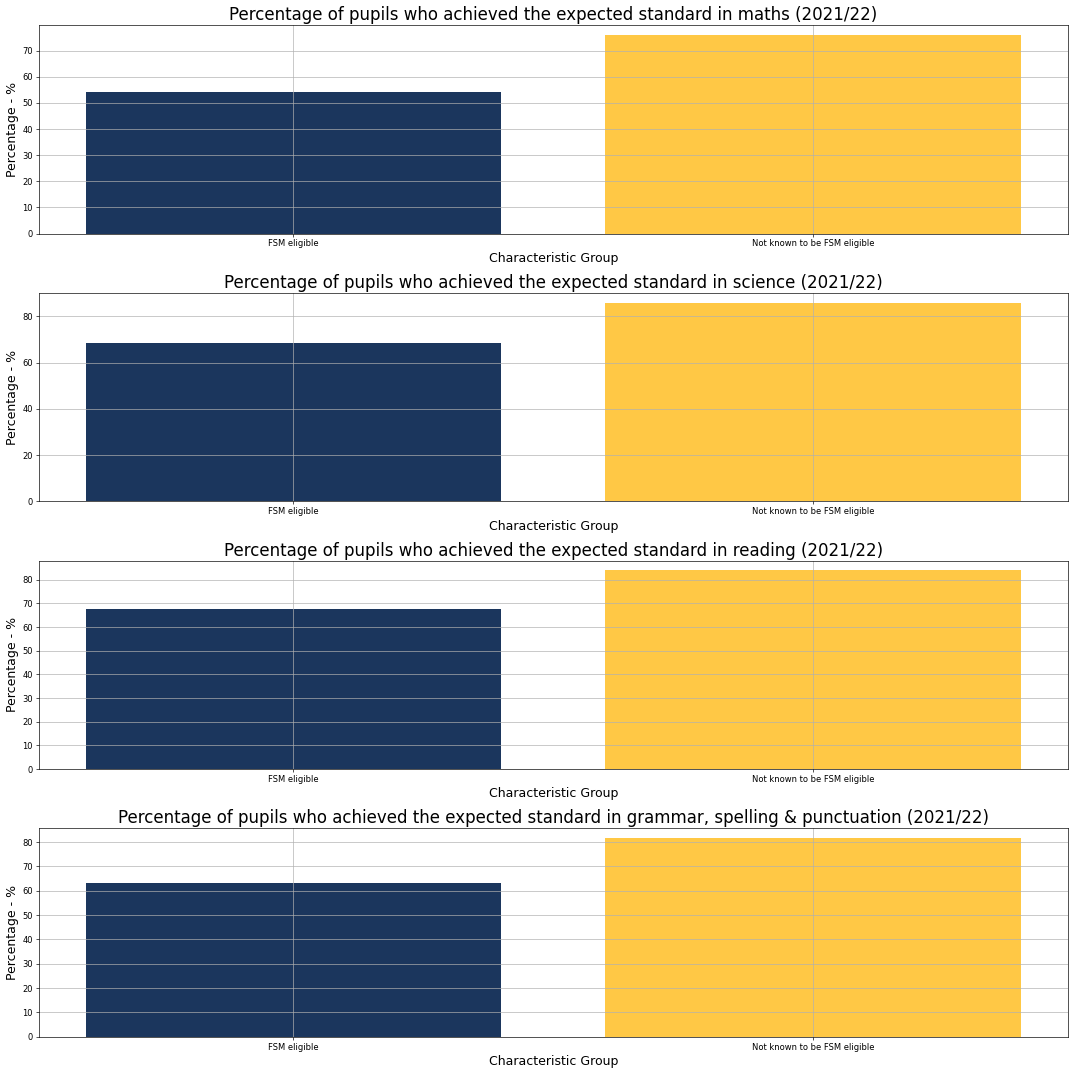

In [40]:
# Define the datasets and parameters for the subplots

datasets = [
    {
        'filtered_df': filtered_df_fsm[(filtered_df_fsm['time_period'] == 202122)],
        'value_column': 'maths_percentage'
    },
    {
        'filtered_df': filtered_df_fsm[(filtered_df_fsm['time_period'] == 202122)],
        'value_column': 'science_percentage'
    },
    {
        'filtered_df': filtered_df_fsm[(filtered_df_fsm['time_period'] == 202122)],
        'value_column': 'reading_percentage'
    },
    {
        'filtered_df': filtered_df_fsm[(filtered_df_fsm['time_period'] == 202122)],
        'value_column': 'grammar_percentage'
    }
]

# Create the 4x1 subplot using the function we just made
create_4x1_subplot(datasets, colours_fsm)

* This plot clearly shows that pupils receieving free school meals underperform those not recieveing free school meals in each of the four Key Stage 2 assessments.
* The difference in performance is over 10% in all four assessments, so is significant.
* By age 10/11 girls receiving free school meals are significantly underperforming their peers.



> Comparing the percentage of pupils who achieved the __expected standard__ across the two groups in each academic year since 2015/16 in the following subjects:


* Maths
* Science
* Reading
* Grammar, punctuation and spelling


Is there a trend in performance over time?

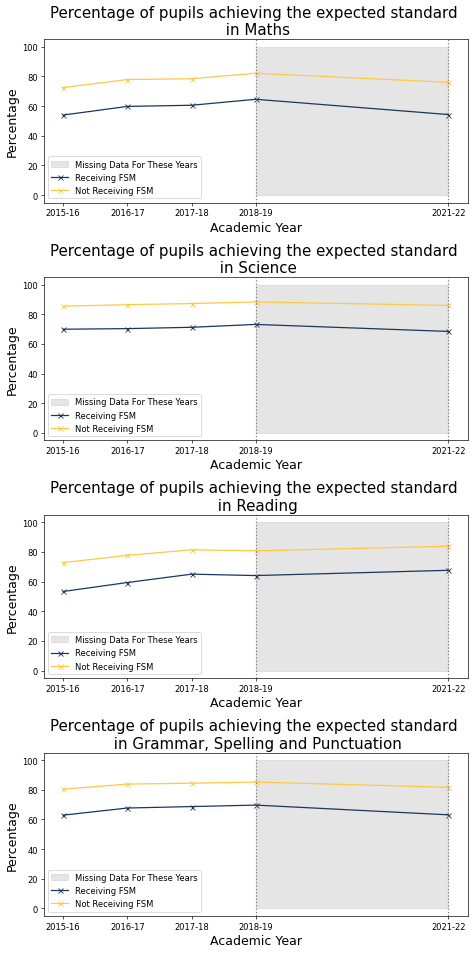

In [41]:
# Importing the patches part of the matplotlib library
import matplotlib.patches as mpatches 

# Creating a function that will allow us to easily reproduce the four sub-plots
def plot_subplot(subplot_index, title, y_label):
    plt.subplot(4, 1, subplot_index)
    plt.plot(fsm_eligible_df['time_period'], fsm_eligible_df[y_label], marker='x', color=colours_fsm[0], label='Receiving FSM')
    plt.plot(not_fsm_eligible_df['time_period'], not_fsm_eligible_df[y_label], marker='x', color=colours_fsm[1], label='Not Receiving FSM')
    plt.title(title, fontsize=18)
    plt.ylabel('Percentage', fontsize=15)
    plt.xlabel('Academic Year', fontsize=15)
    plt.legend()
    plt.xticks(x_ticks, x_labels)
    plt.axvline(x=201819, color='gray', linestyle='dotted')
    plt.axvline(x=202122, color='gray', linestyle='dotted')
    shaded_patch = mpatches.Patch(color='gray', alpha=0.2, label='Shaded Area')
    plt.fill_between([201819, 202122], 0, 100, color='gray', alpha=0.2)
    plt.legend(handles=[shaded_patch])
    line_handles, line_labels = plt.gca().get_legend_handles_labels()
    all_handles = [shaded_patch] + line_handles
    all_labels = ['Missing Data For These Years'] + line_labels
    plt.legend(all_handles, all_labels)

# Changing the size of the plot to make it easier to read
figure(figsize=(8,16), dpi=60)

# Creating the x variable and calculating percentages
x = fsm_ks2_df['time_period']
fsm_ks2_df['maths_percentage'] = (fsm_ks2_df['t_mat_met_expected_standard'] / fsm_ks2_df['t_mat_eligible_pupils']) * 100
fsm_ks2_df['science_percentage'] = (fsm_ks2_df['t_scita_met_expected_standard'] / fsm_ks2_df['t_scita_eligible_pupils']) * 100
fsm_ks2_df['reading_percentage'] = (fsm_ks2_df['t_read_met_expected_standard'] / fsm_ks2_df['t_read_eligible_pupils']) * 100
fsm_ks2_df['grammar_percentage'] = (fsm_ks2_df['t_gps_met_expected_standard'] / fsm_ks2_df['t_gps_eligible_pupils']) * 100

# Assigning the accessible colours to variables for later use
colour1 = '#1b365d'
colour2 = '#ffc845'

# Filtering the dataframe
fsm_eligible_df = fsm_ks2_df[fsm_ks2_df['characteristic'] == 'FSM eligible']
not_fsm_eligible_df = fsm_ks2_df[fsm_ks2_df['characteristic'] == 'Not known to be FSM eligible']

# Setting up the x axis
x_ticks = [201516, 201617, 201718, 201819, 202122]
x_labels = ['2015-16', '2016-17', '2017-18', '2018-19', '2021-22']

# Using teh function to create the sub plots
plot_subplot(1, 'Percentage of pupils achieving the expected standard \n in Maths', 'maths_percentage')
plot_subplot(2, 'Percentage of pupils achieving the expected standard \n in Science', 'science_percentage')
plot_subplot(3, 'Percentage of pupils achieving the expected standard \n in Reading', 'reading_percentage')
plot_subplot(4, 'Percentage of pupils achieving the expected standard \n in Grammar, Spelling and Punctuation', 'grammar_percentage')

# Adjusting the plot layout and viewing it
plt.tight_layout()
plt.show()

* Pupils who do not receive free school meals consistently outperform pupils who do in all four subject over the time periods assessed.
* Prior to the pandemic (the grey areas), scores across all subjects were improving. However, following the pandemic scores fell in all subjects but Reading. This is as expected because pupils schooling was significantly disrupted.
* The chart shows that the decrease in Grammar, Spelling & Reading, Science and Maths attainment over the pandemic period was more pronounced for those pupils who receive free school meals.
* Tieing this chart back to our question, free school meals does seem to have an impact on girls schooling at age 10/11 (key stage 2).

### 4.1.3 Using Machine Learning to extend FSM Database 

* We attempted to use the scikit learn module to use regression analysis to track the expected future results of the two groups in year 2022/23.
* We chose to study the Maths test data - in particular the percentage of pupils achieving the expected standard.
* We attempted to do this to review whether the model expects the attainment gap to widen, shrink or remain the same.

In [42]:
#Importing the Scikit learn libraries we want
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Prepare the Data by selecting the columns we will use
subset_columns = ['characteristic', 'time_period', 't_mat_met_expected_standard', 't_mat_eligible_pupils']
df_subset = fsm_ks2_df[subset_columns]

# Filter the years we want to use
relevant_years = [201516, 201617, 201718, 201819, 202122]
df_filtered = df_subset[df_subset['time_period'].isin(relevant_years)]

# Convert Characteristics column to integers so we can do regression (FSM is now 1 and no FSM is 2)
char_mapping = {'FSM eligible': 1, 'Not known to be FSM eligible': 2}
df_filtered['characteristic'] = df_filtered['characteristic'].map(char_mapping)

# Calculate percentage of pupils achieving expected standard so we can model this forward
df_filtered['percentage_achieved'] = (df_filtered['t_mat_met_expected_standard'] / df_filtered['t_mat_eligible_pupils']) * 100

# Split the data into training and testing sets
X = df_filtered[['characteristic', 'time_period']]
y = df_filtered['percentage_achieved']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

# Predict on the testing set
future_year = 202223
future_data = pd.DataFrame({'characteristic': [1, 2], 'time_period': [future_year, future_year]})
future_pred = reg_model.predict(future_data[['characteristic', 'time_period']])

print("Predicted Percentage of Pupils Achieving Expected Standard for", future_year)
print(future_data)
print(future_pred)


Predicted Percentage of Pupils Achieving Expected Standard for 202223
   characteristic  time_period
0               1       202223
1               2       202223
[62.70170864 80.80519133]




> Interpreting this result:


* The linear regression model has predicted the percentage of pupils achieving the expected standard for the year 2022/23 is 62.70% for pupils receiving FSM and 80.81% for pupils not receiving FSMs. These values represent the model's estimate based on the provided data and the relationship it learned during training.



> Plotting the result on a line chart


* To bring some of the findings together we have added the results expected by the model to the line chart previously created for scores in the maths text over time.

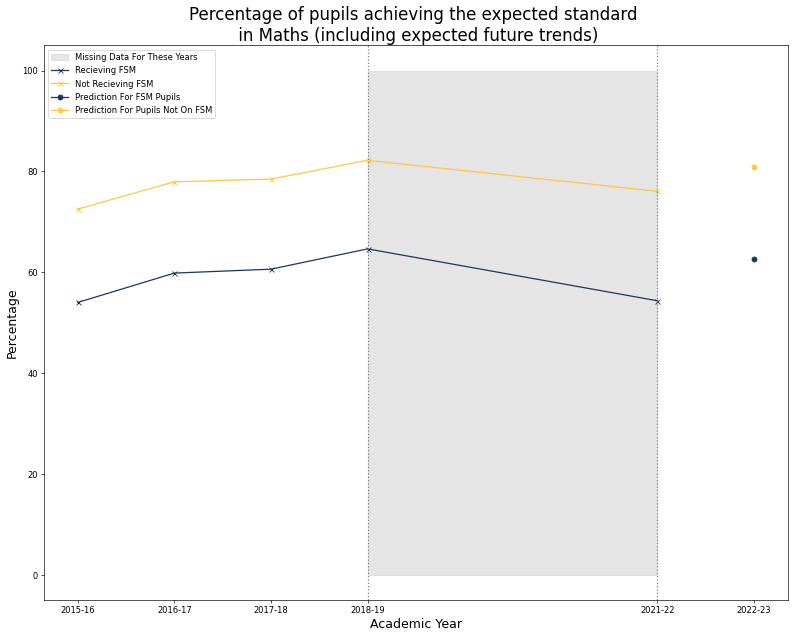

In [43]:
# Jade
# Changing the size of the plot to make it easier to read
figure(figsize=(16,12), dpi=60)

# Store the predicted 2022/23 values to variables
predicted_percentage_fsm = future_pred[0]
predicted_percentage_not_fsm = future_pred[1]

# plotting the x axis
x = fsm_ks2_df['time_period']

# Calculate the percentages for each group for each subject
fsm_ks2_df['maths_percentage'] = (fsm_ks2_df['t_mat_met_expected_standard'] / fsm_ks2_df['t_mat_eligible_pupils']) * 100

# Filter the DataFrame for 'FSM eligible' group
fsm_eligible_df = fsm_ks2_df[fsm_ks2_df['characteristic'] == 'FSM eligible']

# Filter the DataFrame for 'Not known to be FSM eligible' group
not_fsm_eligible_df = fsm_ks2_df[fsm_ks2_df['characteristic'] == 'Not known to be FSM eligible']

# Plot the lines for the maths plot
plt.plot(fsm_eligible_df['time_period'], fsm_eligible_df['maths_percentage'], marker='x', color=colours_fsm[0], label='Recieving FSM')
plt.plot(not_fsm_eligible_df['time_period'], not_fsm_eligible_df['maths_percentage'], marker='x', color=colours_fsm[1], label='Not Recieving FSM')

# Add the predicted results to the plot
plt.plot([202223], [predicted_percentage_fsm], marker='o', color=colours_fsm[0], label='Prediction For FSM Pupils')
plt.plot([202223], [predicted_percentage_not_fsm], marker='o', color=colours_fsm[1], label='Prediction For Pupils Not On FSM')

# Add the labels for the maths subplot
plt.title('Percentage of pupils achieving the expected standard \n in Maths (including expected future trends)', fontsize=20)
plt.ylabel('Percentage', fontsize=15)
plt.xlabel('Academic Year', fontsize=15)
plt.legend()

# Update the x-axis tick positions and labels
x_ticks = [201516, 201617, 201718, 201819, 202122, 202223]
x_labels = ['2015-16', '2016-17', '2017-18', '2018-19', '2021-22', '2022-23']
plt.xticks(x_ticks, x_labels)


# Draw a dotted line between points 2018-19 and 2021-22
plt.axvline(x=201819, color='gray', linestyle='dotted')
plt.axvline(x=202122, color='gray', linestyle='dotted')

# Shade the region between the two dotted lines
shaded_patch = mpatches.Patch(color='gray', alpha=0.2, label='Shaded Area')
plt.fill_between([201819, 202122], 0, 100, color='gray', alpha=0.2)
plt.legend(handles=[shaded_patch])

# Add the shaded area patch and the predicted results to the legend
line_handles, line_labels = plt.gca().get_legend_handles_labels()
all_handles = [shaded_patch] + line_handles
all_labels = ['Missing Data For These Years'] + line_labels + ['Prediction For FSM Pupils', 'Prediction For Pupils Not On FSM']
plt.legend(all_handles, all_labels)
# Display the combined legend
plt.legend(all_handles, all_labels)

* The chart shows us that the model expects pupils performance to improve in 2022/23 compared to 2021/22.
* Performance for both characteristic groups is expected to improve.
* Potentially this result could be because prior to the pandemic performance was increasing in both groups, however following the pandemic performance decreased - most likely due to disruptions in schooling. The model could be expecting a return to previous trends now that school pupils have returned to school full time following lockdown restrictions being removed.
* Important for our research question is that the model does not expect the gap between the two groups to close or widen significantly.
* Girls recieving FSM continue to underperform their peers.

* Note regarding the model - as this is a basic model with not much historical data, the model has been less sucessful on the first language and ethnicity dataframes as there are more variables to condier. Because of this we have chosen to omit those graphs, but if we had more time this is something we would work on to try to get better predictions.

### 4.1.4 Summary

* Going back to our original research question - our analysis shows that whether or not a girl is on Free School Meals has an impact on her attainment at key stage 2 in all four standard tests.
* Girls on FSM tend to underperform and are less likely to achieve the expected standard at age 10-11 compared to their peers.
* This is an extension of the trend shown in year 4 (age 8-9).
* We can therefore use our analysis to argue with decision makers in the education field (for example Department For Education) that more funding needs to be put in place before age 10-11 to help girls recieving Free School Meals achieve their full potential.

## 4.2 ETHNICITY DATABASE - IMPORT AND ANALYSIS (KS2)

### 4.2.1 Import clean CSV file

In [44]:
try:
    ethnicity_ks2_df = pd.read_csv('ethnicity_ks2_df.csv')
    print('Sucessfully connected!')
except FileNotFoundError:
    print("File not found. Please check the file path.")



Sucessfully connected!


### 4.2.2 Statistical & Visual Analysis

 Comparing the percentage of pupils who achieved the __expected standard__ across the ethnic major groups in the most recent academic year of data (2021-2022) in the following subjects:
* Maths
* Science
* Reading
* Grammar, punctuation and spelling



> Filter the Dataframe for 2021-22 and find the percentage of pupils who achieved the expected standard across the ethnic major groups



In [45]:
# Filter dataframe to be in 202122 year
filtered_df_ethnicity_ks2 = ethnicity_ks2_df[(ethnicity_ks2_df['time_period'] == 202122)]

In [46]:
# Create maths percentage column & round by 2 decimal places
filtered_df_ethnicity_ks2['maths_percentage'] = ((filtered_df_ethnicity_ks2['t_mat_met_expected_standard'] / filtered_df_ethnicity_ks2['t_mat_eligible_pupils']) * 100).round(2)

In [47]:
# Create science percentage column & round by 2 decimal places
filtered_df_ethnicity_ks2['science_percentage'] = ((filtered_df_ethnicity_ks2['t_scita_met_expected_standard'] / filtered_df_ethnicity_ks2['t_scita_eligible_pupils']) * 100).round(2)

In [48]:
# Create reading percentage column & round by 2 decimal places
filtered_df_ethnicity_ks2['reading_percentage'] = ((filtered_df_ethnicity_ks2['t_read_met_expected_standard'] / filtered_df_ethnicity_ks2['t_read_eligible_pupils']) * 100).round(2)

In [49]:
# Create grammar, spelling, puntuation percentage column and round by 2 decimal places
filtered_df_ethnicity_ks2['grammar_percentage'] = ((filtered_df_ethnicity_ks2['t_gps_met_expected_standard'] / filtered_df_ethnicity_ks2['t_gps_eligible_pupils']) * 100).round(2)



> Visualising the percentage of pupils who achieved the expected standard across the ethnic major groups in the most recent academic year of data (2021-2022)



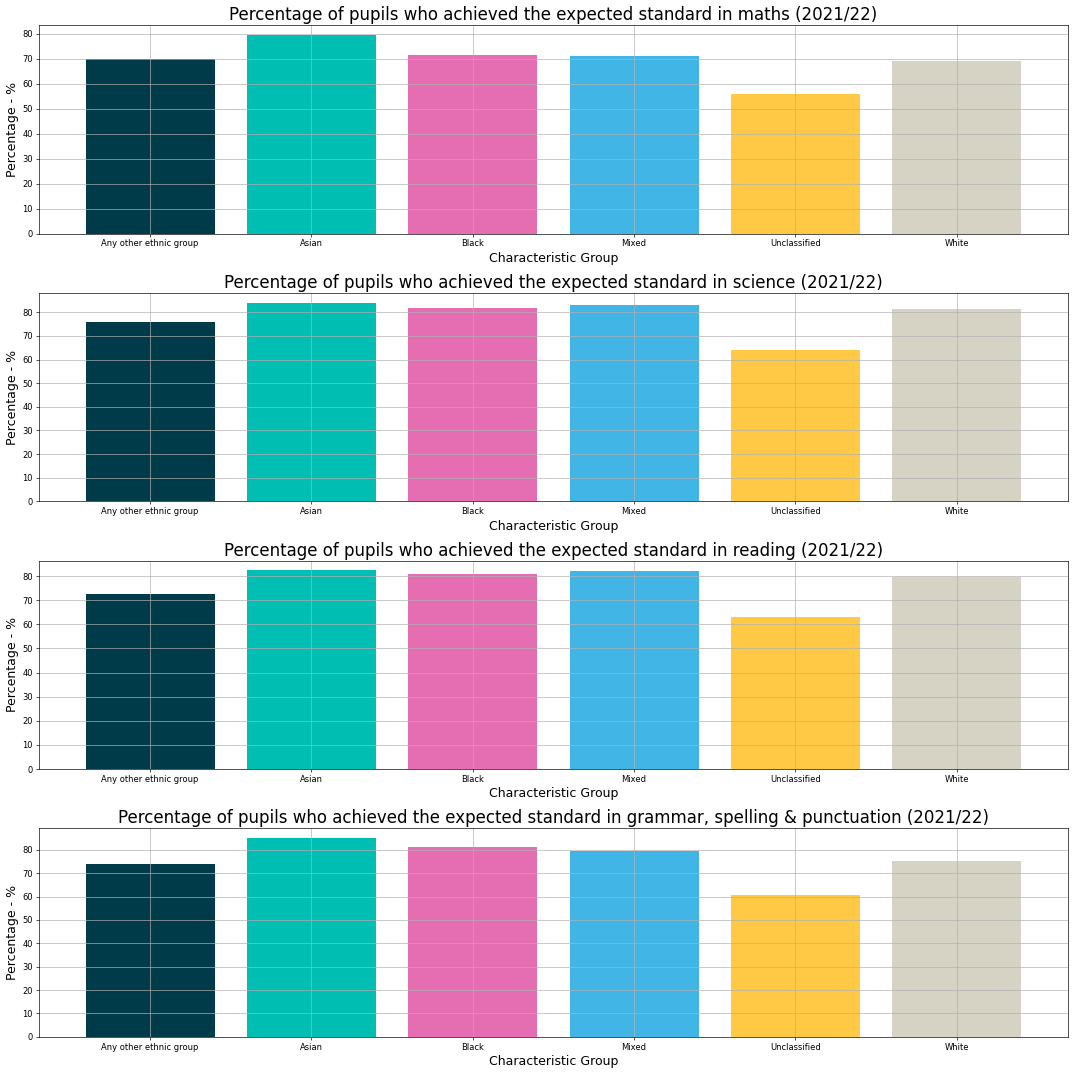

In [50]:
# Define the datasets and parameters for the subplots
datasets = [{'filtered_df': filtered_df_ethnicity_ks2[(filtered_df_ethnicity_ks2['time_period'] == 202122)],
        'value_column': 'maths_percentage'},
    {'filtered_df': filtered_df_ethnicity_ks2[(filtered_df_ethnicity_ks2['time_period'] == 202122)],
        'value_column': 'science_percentage'},
    {'filtered_df': filtered_df_ethnicity_ks2[(filtered_df_ethnicity_ks2['time_period'] == 202122)],
        'value_column': 'reading_percentage'},
    {'filtered_df': filtered_df_ethnicity_ks2[(filtered_df_ethnicity_ks2['time_period'] == 202122)],
        'value_column': 'grammar_percentage'}]

# Create the 4x1 subplot using the function we made at the fsm stage
create_4x1_subplot(datasets, colours_ethnic_major)



> Summary of the percentage of pupils who achieved the expected standard across the ethnic major groups in the most recent academic year of data (2021-2022):



- In all 4 assessments, Asian pupils are the ethnic major that achieved the highest expected standard
- In comparison, Unclassified ethnic major pupils, achieved almost 20% less than Asian pupils in the same tests



> Comparing the percentage of pupils who achieved the expected standard across the six ethnic majors in each academic year since 2015/16 in the following subjects:


- Maths
- Science
- Reading
- Grammar, punctuation and spelling

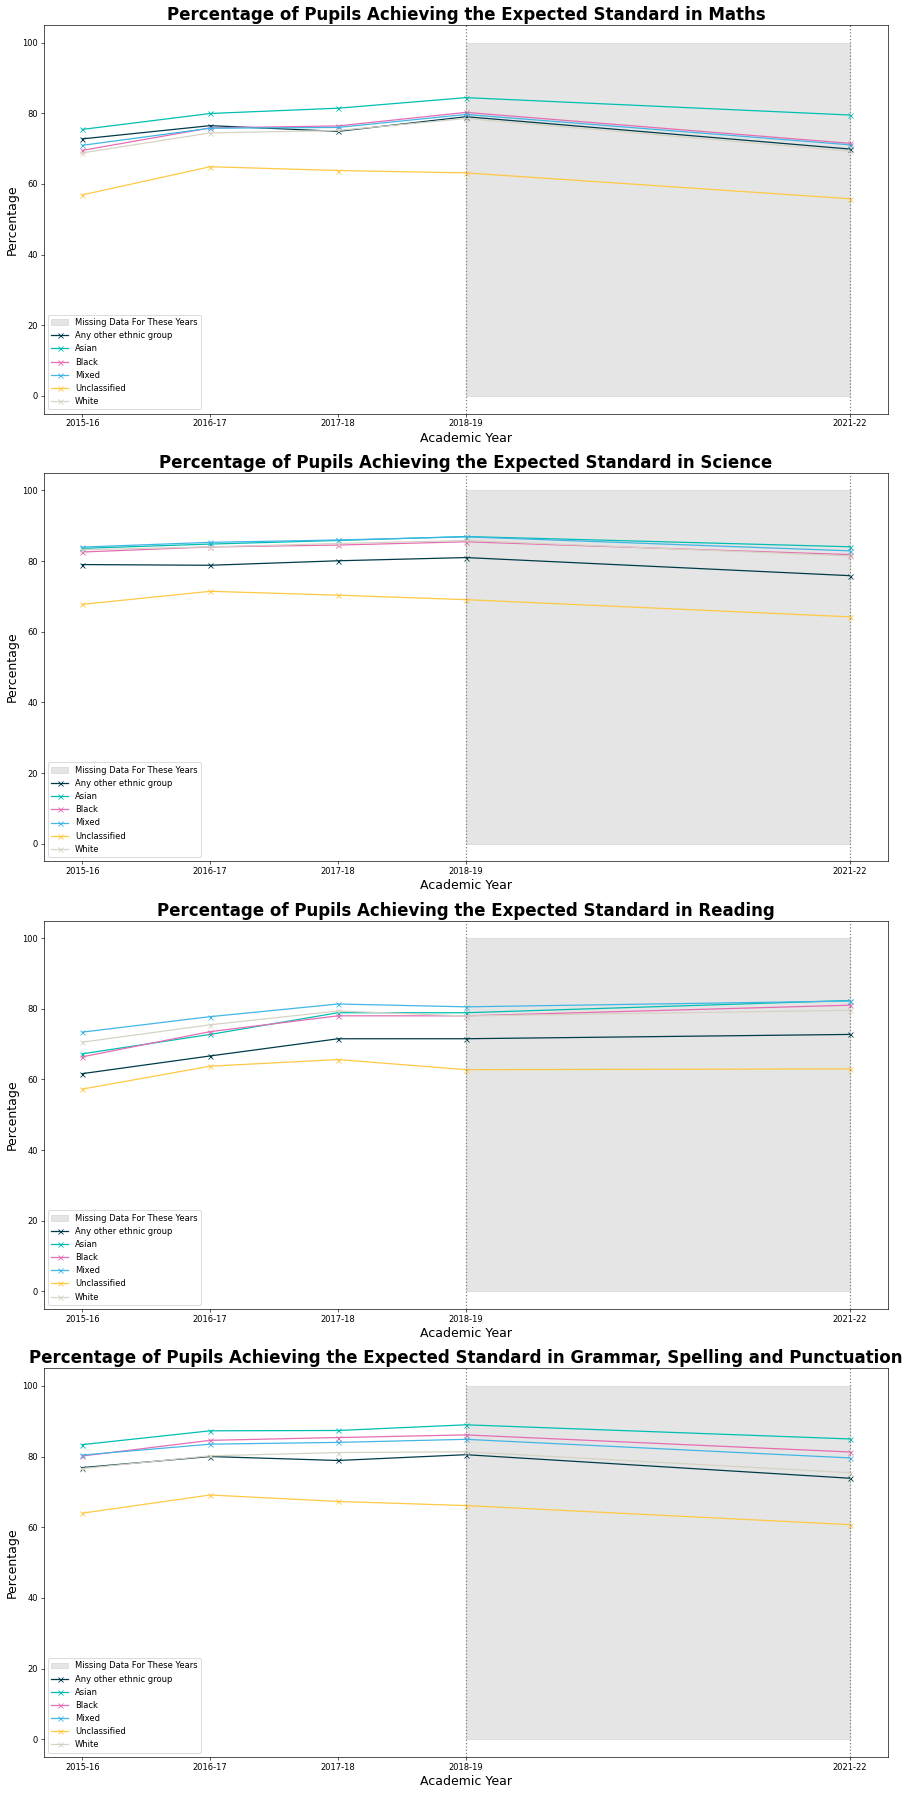

In [51]:
# Creating a function that will allow us to easily reproduce the four sub-plots
def plot_subplot(subplot_index, title, y_label):
    plt.subplot(4, 1, subplot_index)
    plt.plot(other_ethnicity_ks2_df['time_period'], other_ethnicity_ks2_df[y_label], marker='x', color=colours_ethnic_major[0], label='Any other ethnic group')
    plt.plot(asian_ethnicity_ks2_df['time_period'], asian_ethnicity_ks2_df[y_label], marker='x', color=colours_ethnic_major[1], label='Asian')
    plt.plot(black_ethnicity_ks2_df['time_period'], black_ethnicity_ks2_df[y_label], marker='x', color=colours_ethnic_major[2], label='Black')
    plt.plot(mixed_ethnicity_ks2_df['time_period'], mixed_ethnicity_ks2_df[y_label], marker='x', color=colours_ethnic_major[3], label='Mixed')
    plt.plot(unclassified_ethnicity_ks2_df['time_period'], unclassified_ethnicity_ks2_df[y_label], marker='x', color=colours_ethnic_major[4], label='Unclassified')
    plt.plot(white_ethnicity_ks2_df['time_period'], white_ethnicity_ks2_df[y_label], marker='x', color=colours_ethnic_major[5], label='White')
    
    plt.title(title, fontsize = 20, weight = 'bold')
    plt.ylabel('Percentage', fontsize = 15)
    plt.xlabel('Academic Year', fontsize = 15)
    plt.legend()
    plt.xticks(x_ticks, x_labels)
    plt.axvline(x = 201819, color = 'gray', linestyle = 'dotted')
    plt.axvline(x = 202122, color = 'gray', linestyle = 'dotted')
    shaded_patch = mpatches.Patch(color = 'gray', alpha = 0.2, label = 'Shaded Area')
    plt.fill_between([201819, 202122], 0, 100, color = 'gray', alpha = 0.2)
    plt.legend(handles = [shaded_patch])
    line_handles, line_labels = plt.gca().get_legend_handles_labels()
    all_handles = [shaded_patch] + line_handles
    all_labels = ['Missing Data For These Years'] + line_labels
    plt.legend(all_handles, all_labels)

# Changing the size of the plot to make it easier to read
figure(figsize=(15,30), dpi=60)

# Creating the x variable and calculating percentages
x = ethnicity_ks2_df['time_period']

ethnicity_ks2_df['maths_percentage'] = ((ethnicity_ks2_df['t_mat_met_expected_standard'] / ethnicity_ks2_df['t_mat_eligible_pupils']) * 100).round(2)
ethnicity_ks2_df['science_percentage'] = ((ethnicity_ks2_df['t_scita_met_expected_standard'] / ethnicity_ks2_df['t_scita_eligible_pupils']) * 100).round(2)
ethnicity_ks2_df['reading_percentage'] = ((ethnicity_ks2_df['t_read_met_expected_standard'] / ethnicity_ks2_df['t_read_eligible_pupils']) * 100).round(2)
ethnicity_ks2_df['grammar_percentage'] = ((ethnicity_ks2_df['t_gps_met_expected_standard'] / ethnicity_ks2_df['t_gps_eligible_pupils']) * 100).round(2)


# Filtering the dataframe
other_ethnicity_ks2_df = ethnicity_ks2_df[ethnicity_ks2_df['characteristic'] == 'Any other ethnic group']
asian_ethnicity_ks2_df = ethnicity_ks2_df[ethnicity_ks2_df['characteristic'] == 'Asian']
black_ethnicity_ks2_df = ethnicity_ks2_df[ethnicity_ks2_df['characteristic'] == 'Black']
mixed_ethnicity_ks2_df = ethnicity_ks2_df[ethnicity_ks2_df['characteristic'] == 'Mixed']
unclassified_ethnicity_ks2_df = ethnicity_ks2_df[ethnicity_ks2_df['characteristic'] == 'Unclassified']
white_ethnicity_ks2_df = ethnicity_ks2_df[ethnicity_ks2_df['characteristic'] == 'White']


# Setting up the x axis
x_ticks = [201516, 201617, 201718, 201819, 202122]
x_labels = ['2015-16', '2016-17', '2017-18', '2018-19', '2021-22']

# Using teh function to create the sub plots
plot_subplot(1, 'Percentage of Pupils Achieving the Expected Standard in Maths', 'maths_percentage')
plot_subplot(2, 'Percentage of Pupils Achieving the Expected Standard in Science', 'science_percentage')
plot_subplot(3, 'Percentage of Pupils Achieving the Expected Standard in Reading', 'reading_percentage')
plot_subplot(4, 'Percentage of Pupils Achieving the Expected Standard in Grammar, Spelling and Punctuation', 'grammar_percentage')

# Adjusting the plot layout and viewing it
plt.tight_layout()
plt.show()



> Summary of percentage of pupils achieving the expected standard from 2015 to 2022 in the six ethnic majors



- Unclassified pupils achieving the expected standard has been consistently lower than all other ethnic majors across the time period of 2015-2022 in every KS2 test
- In maths, science, grammar, spelling and puntuation tests, pupils across all ethnic majors have decreased in achieving the expected standard during between the 2018-19 academic year and 2021-22 academic year
- In reading, pupils accross have increased slightly in achieving the expected standard in all ethnic majors between 2018-19 and 2021-22

### 4.2.3 Summary

* Going back to our original research question - our analysis shows that a girl's ethnic major has an impact on her attainment at Key Stage 2 in all four standard tests
* Girls from an Unclassified ethnicity significantly underperform in all KS2 standard tests and are less likely to achieve the expected standard at age 10-11 compared to their peers
* Girls from an Asian ethnicity tend to have have a higher peformance across all four tests
* Over the pandemic years (2019-2021) all ethnic majors saw a decrease in achievement for the Maths, Science and Grammer, Puntatuation and Spelling tests but an increase in achievement in the reading test 

## 4.3 ENGLISH AS A FIRST LANGUAGE- IMPORT AND ANALYSIS (KS2)

### 4.3.1 Importing the Key Stage 2 (first language) csv file

In [52]:
try:
    lang_ks2_df = pd.read_csv('lang_ks2_df.csv')
    print('Sucessfully connected!')
except FileNotFoundError:
    print("File not found. Please check the file path.")



Sucessfully connected!


### 4.3.2 Statistical & Visual Analysis



In [53]:
# Calculating percentages
x = lang_ks2_df['time_period']
lang_ks2_df['maths_percentage'] = (lang_ks2_df['t_mat_met_expected_standard'] / lang_ks2_df['t_mat_eligible_pupils']) * 100
lang_ks2_df['science_percentage'] = (lang_ks2_df['t_scita_met_expected_standard'] / lang_ks2_df['t_scita_eligible_pupils']) * 100
lang_ks2_df['reading_percentage'] = (lang_ks2_df['t_read_met_expected_standard'] / lang_ks2_df['t_read_eligible_pupils']) * 100
lang_ks2_df['grammar_percentage'] = (lang_ks2_df['t_gps_met_expected_standard'] / lang_ks2_df['t_gps_eligible_pupils']) * 100

# Filtering the dataframe
english_df = lang_ks2_df[lang_ks2_df['characteristic'] == 'Known or believed to be English']
not_english_df = lang_ks2_df[lang_ks2_df['characteristic'] == 'Known or believed to be other than English']
other_df = lang_ks2_df[lang_ks2_df['characteristic'] == 'Language unclassified']


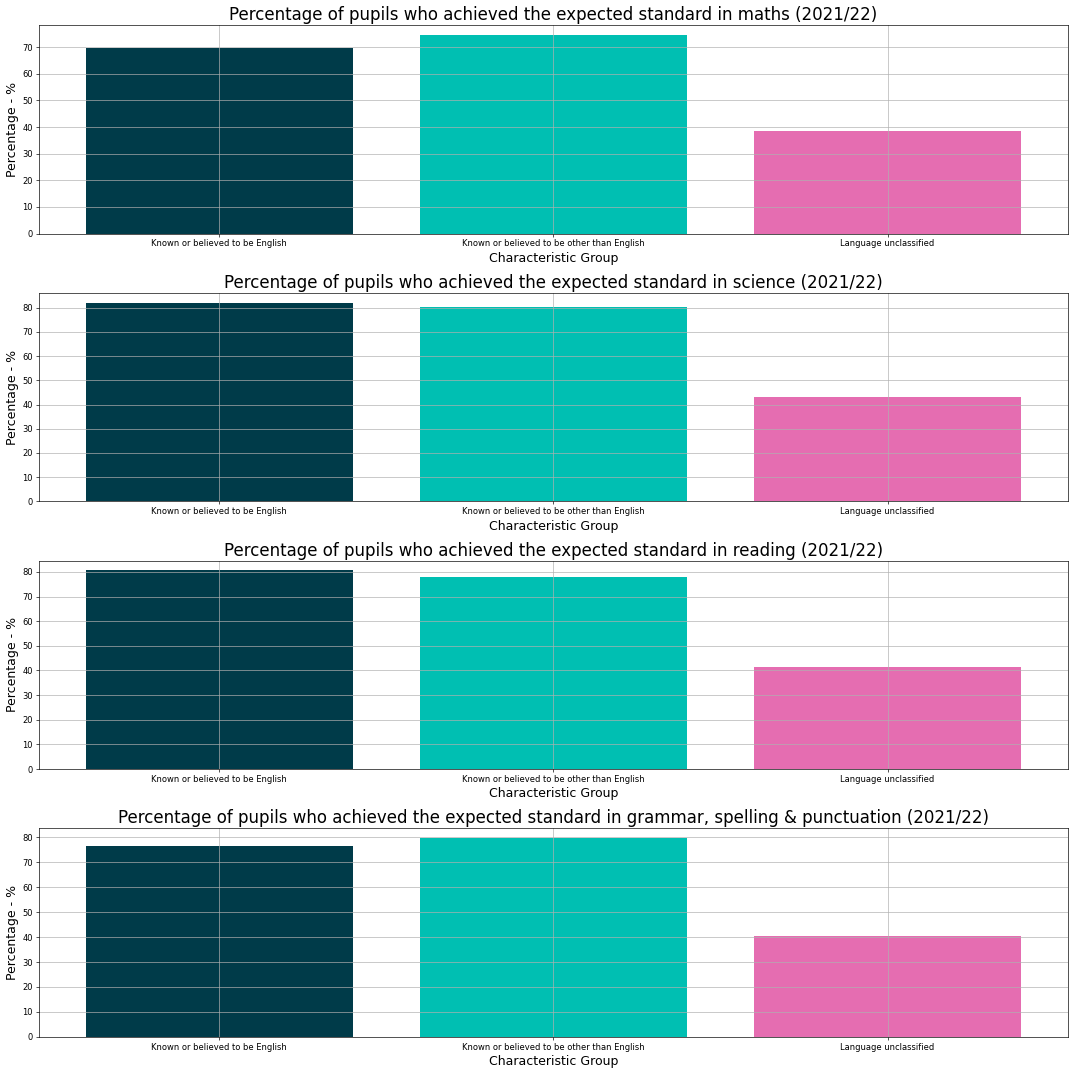

In [54]:
# Define the datasets and parameters for the subplots
datasets = [
    {
        'filtered_df': lang_ks2_df[(lang_ks2_df['time_period'] == 202122)],
        'value_column': 'maths_percentage'
    },
    {
        'filtered_df': lang_ks2_df[(lang_ks2_df['time_period'] == 202122)],
        'value_column': 'science_percentage'
    },
    {
        'filtered_df': lang_ks2_df[(lang_ks2_df['time_period'] == 202122)],
        'value_column': 'reading_percentage'
    },
    {
        'filtered_df': lang_ks2_df[(lang_ks2_df['time_period'] == 202122)],
        'value_column': 'grammar_percentage'
    }
]

# Create the 4x1 subplot using the function we made in the fsm step
create_4x1_subplot(datasets, colours_lang)




> Comparison with 2015/2016 data: Visualisation



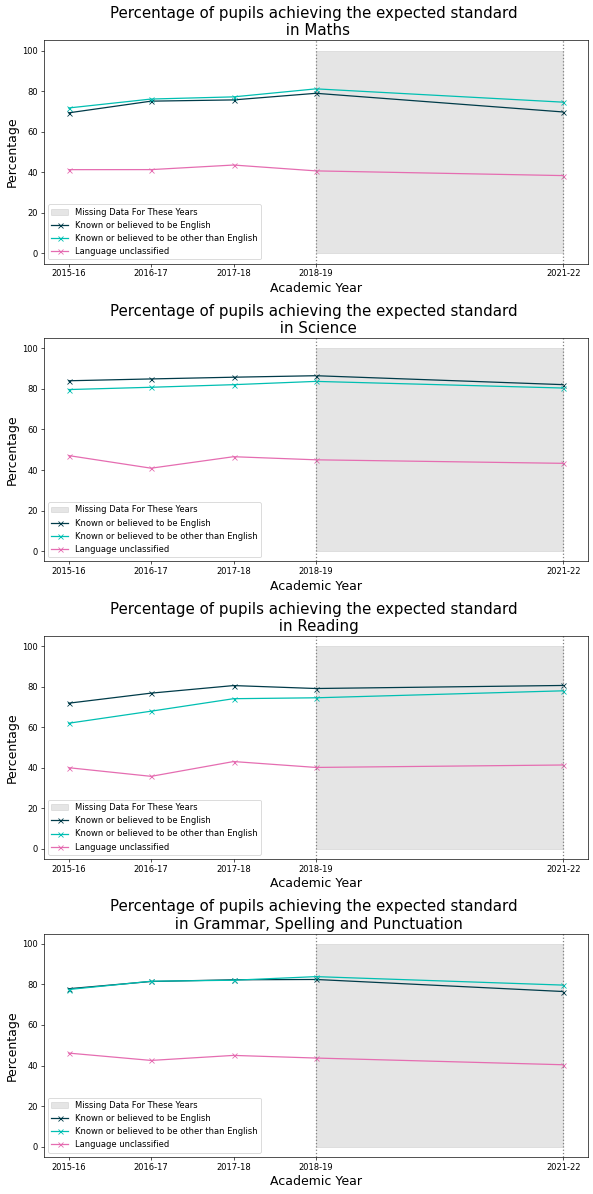

In [55]:
# Changing the size of the plot to make it easier to read
figure(figsize=(10, 20), dpi=60)


# Setting up the x axis
x_ticks = [201516, 201617, 201718, 201819, 202122]
x_labels = ['2015-16', '2016-17', '2017-18', '2018-19', '2021-22']

# Creating a function that will allow us to easily reproduce the four sub-plots
def plot_subplot(subplot_index, title, y_label):
    plt.subplot(4, 1, subplot_index)
    plt.plot(english_df['time_period'], english_df[y_label], marker='x', color=colours_lang[0], label='Known or believed to be English')
    plt.plot(not_english_df['time_period'], not_english_df[y_label], marker='x', color=colours_lang[1], label='Known or believed to be other than English')
    plt.plot(other_df['time_period'], other_df[y_label], marker='x', color=colours_lang[2], label='Language unclassified')
    plt.title(title, fontsize=18)
    plt.ylabel('Percentage', fontsize=15)
    plt.xlabel('Academic Year', fontsize=15)
    plt.legend()
    plt.xticks(x_ticks, x_labels)
    plt.axvline(x=201819, color='gray', linestyle='dotted')
    plt.axvline(x=202122, color='gray', linestyle='dotted')
    shaded_patch = mpatches.Patch(color='gray', alpha=0.2, label='Shaded Area')
    plt.fill_between([201819, 202122], 0, 100, color='gray', alpha=0.2)
    plt.legend(handles=[shaded_patch])
    line_handles, line_labels = plt.gca().get_legend_handles_labels()
    all_handles = [shaded_patch] + line_handles
    all_labels = ['Missing Data For These Years'] + line_labels
    plt.legend(all_handles, all_labels, fontsize=10)

# Using the function to create the sub-plots
plot_subplot(1, 'Percentage of pupils achieving the expected standard \n in Maths', 'maths_percentage')
plot_subplot(2, 'Percentage of pupils achieving the expected standard \n in Science', 'science_percentage')
plot_subplot(3, 'Percentage of pupils achieving the expected standard \n in Reading', 'reading_percentage')
plot_subplot(4, 'Percentage of pupils achieving the expected standard \n in Grammar, Spelling and Punctuation', 'grammar_percentage')

# Adjusting the plot layout and viewing it
plt.tight_layout()
plt.show()


### 4.3.3 Summary

* Pupils whose language is Unclassifed significantly underperform their peers in all four subjects.
* The groups English as a first language and English not a first language are much closer in all four subjects. This implies there is not a significant difference between the two groups.
* The chart showing change over time shows that the percentage passing each subject has not significantly changed over the time period assessed.
* During the pandemic years (where we do not have data) the percentage achieving an expected standard in Maths, Science and Grammar, Spelling and Punctuation decreased across all three groups. This is a trend we would expect as pupils schooling was disrupted over the two year period.
* Interestingly, the percentage of pupils achieving the expected standard in Reading improved over the pandemic years.
* Linking back to our research question, our analysis shows that a girls first language at age 10/11 does not have too strong an impact on her attainment in academic tests. However if a girl falls into the 'Unclassified' group she is significantly more likely to underperform her peers. Unfortuantely the source of our information (Department for Education) has not made it clear how a pupil would be catergorised as 'Unclassified'. We would need to do more research into this catergory to be able to come to more accurate conclusions.

# **5. KEY STAGE 4 ATTAINMENT DATA**

![picture](quiz_image.jpeg)


## 5.1 FREE SCHOOL MEALS - IMPORT AND ANALYSIS (KS4)

### 5.1.1 Importing the Key Stage 4 (free school meals) csv file

In [56]:
try:
    fsm_ks4_df = pd.read_csv('fsm_ks4_df.csv')
    print('Sucessfully connected!')
except FileNotFoundError:
    print("File not found. Please check the file path.")



Sucessfully connected!


Comparing the percentage of pupils receiving Grade 4 or above, or Grade 5 or above based on free school meal eligibility.


*   The data measures the percentage of pupils at state-funded mainstream schools in England
*   We are looking at the percentage of pupils achieving grades 4 or above in English and mathematics GCSEs and the percentage of pupils achieving grades 5 or above in English and mathematics GCSEs.  
*   The Government has said that grade 4 is a 'standard pass'.  Grade 4 remains the level that students must achieve without needing to resit English and Maths post-16.
*   Grade 5 is a 'strong pass' and equivalent to a high C and low B on the old grading system.




In [57]:
# The top rows of each year in the dataset are the national level statistics - 
# we need to use only these when doing analysis on the national picture
# creating a new df based on geographic_level = National

new_fsm_ks4_df = fsm_ks4_df[fsm_ks4_df['geographic_level'] == 'National']



### 5.1.2 Statistical & Visual Analysis 

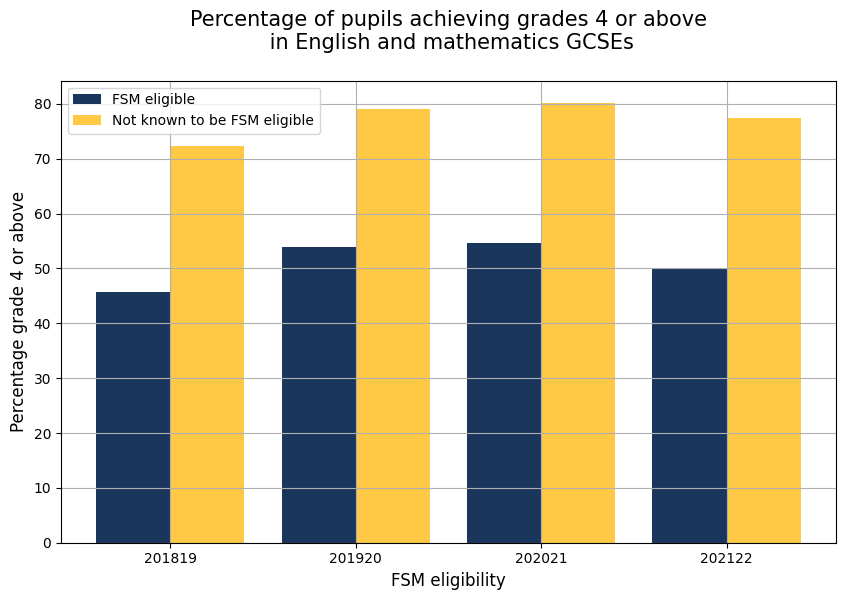

In [58]:
# Percentage of pupils achieving grades 4 (pass) or above in English and mathematics GCSEs based on FSM

x_ks4_new_fsm_ks4_df = new_fsm_ks4_df['time_period']
y_ks4_new_fsm_ks4_df = new_fsm_ks4_df.groupby(['time_period', 'characteristic_free_school_meals'])['pt_l2basics_94'].sum()

# separate out the two values returned in the characteristic_free_school_meals column
y_ks4_new_fsm_ks4_df = y_ks4_new_fsm_ks4_df.unstack('characteristic_free_school_meals')

fsm_data = y_ks4_new_fsm_ks4_df['FSM']
not_fsm_data = y_ks4_new_fsm_ks4_df['FSM all other']

x_positions = np.arange(len(fsm_data))

bar_width = 0.4

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.xlabel('FSM eligibility', fontsize = 12)
plt.ylabel('Percentage grade 4 or above', fontsize = 12)
plt.bar(x_positions, fsm_data, width=bar_width, label='FSM eligible', color=colours_fsm[0])
plt.bar(x_positions + bar_width, not_fsm_data, width=bar_width, label='Not known to be FSM eligible', color=colours_fsm[1])
plt.xticks(x_positions + bar_width / 2,['201819', '201920', '202021', '202122'])

plt.title("Percentage of pupils achieving grades 4 or above\n in English and mathematics GCSEs\n", fontsize = 15)
plt.legend()  # Show the legend
plt.grid()
plt.show() 



The results show us that approximately 30% of pupils eligible for Free School Meals achieved grades 4 or above across the four years we have data for, compared to 57% of those not known to be eligible for Free School Meals.

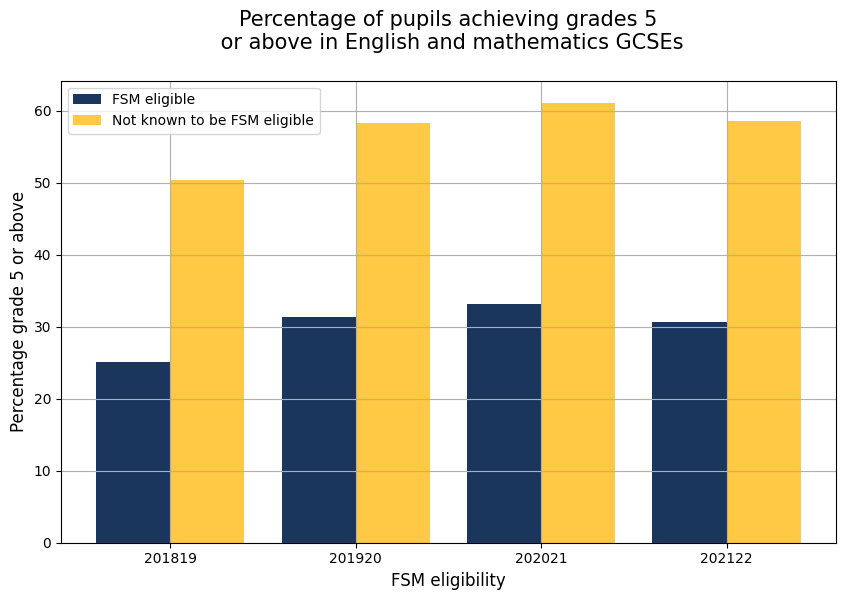

In [59]:
# Percentage of pupils achieving grades 5 (strong pass) or above in English and mathematics GCSEs based on FSM


x_ks4_new_fsm_ks4_df = new_fsm_ks4_df['time_period']
y_ks4_new_fsm_ks4_df = new_fsm_ks4_df.groupby(['time_period', 'characteristic_free_school_meals'])['pt_l2basics_95'].sum()

# separate out the two values returned in the characteristic_free_school_meals column
y_ks4_new_fsm_ks4_df = y_ks4_new_fsm_ks4_df.unstack('characteristic_free_school_meals')

fsm_data = y_ks4_new_fsm_ks4_df['FSM']
not_fsm_data = y_ks4_new_fsm_ks4_df['FSM all other']

x_positions = np.arange(len(fsm_data))

bar_width = 0.4

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.xlabel('FSM eligibility', fontsize = 12)
plt.ylabel('Percentage grade 5 or above', fontsize = 12)
plt.bar(x_positions, fsm_data, width=bar_width, label='FSM eligible', color=colours_fsm[0])
plt.bar(x_positions + bar_width, not_fsm_data, width=bar_width, label='Not known to be FSM eligible', color=colours_fsm[1])
plt.xticks(x_positions + bar_width / 2,['201819', '201920', '202021', '202122'])

plt.title("Percentage of pupils achieving grades 5\n or above in English and mathematics GCSEs\n", fontsize = 15)
plt.legend()  # Show the legend
plt.grid()
plt.show()

The results show us that approximately 51% of pupils eligible for Free School Meals achieved grades 5 or above across the four years we have data for, compared to 77% of those not known to be eligible for Free School Meals.

### 5.1.3 Summary


*   Our data shows us that the percentage of students achieving grades 5 or above is less than those achieving grades 4 or above in GCSEs each year.  This is inline with expectations since as the grades get higher, we expect the percentage of pupils receiving them to get lower.
*   Between 201819 and 201920, the percentage of pupils achieving grades 4 and above and grades 5 and above did jump up, but have since levelled off with less variance between years.
*   Exams were cancelled in 2020/2021 due to the COVID-19 pandemic so in 2021 students were awared grades based on what they teachers believed they would have achieved if sitting the exams.  For this academic year, the percentages are slightly higher for FSM eligible and Not known to be FSM eligible pupils.  The government website advises against using the 2020/2021 data for comparisons which makes it difficult for us to forecast trends until we have a couple more years of data post pandemic.
*  The results of our data across all four years shows that fewer FSM pupils achieve passes and strong passes in English and mathematics GCSEs.  The difference in percentages is notable with approximately 26% fewer students eligible for FSM achieving level 4 and 27% fewer achieving level 5, so we can conclude that eligibility for FSM definitely has an impact on girls' attainment at KS4.
*  In conclusion, we can deduce that eligibility for FSM has an impact on girls' attainment throughout compulsory years of education.



## 5.2 ENGLISH AS A FIRST LANGUAGE - IMPORT AND ANALYIS (KS4)

### 5.2.1 Importing the Key Stage 4 (first language) csv file

In [60]:
try:
    lang_ks4_df = pd.read_csv('lang_ks4_df.csv')
    print('Sucessfully connected!')
except FileNotFoundError:
    print("File not found. Please check the file path.")



Sucessfully connected!


### 5.2.2 Statistical & Visual Analysis

 Showing the percentage of pupils achieving a grade 4 or above in both Maths and English GCSEs in the different groups.

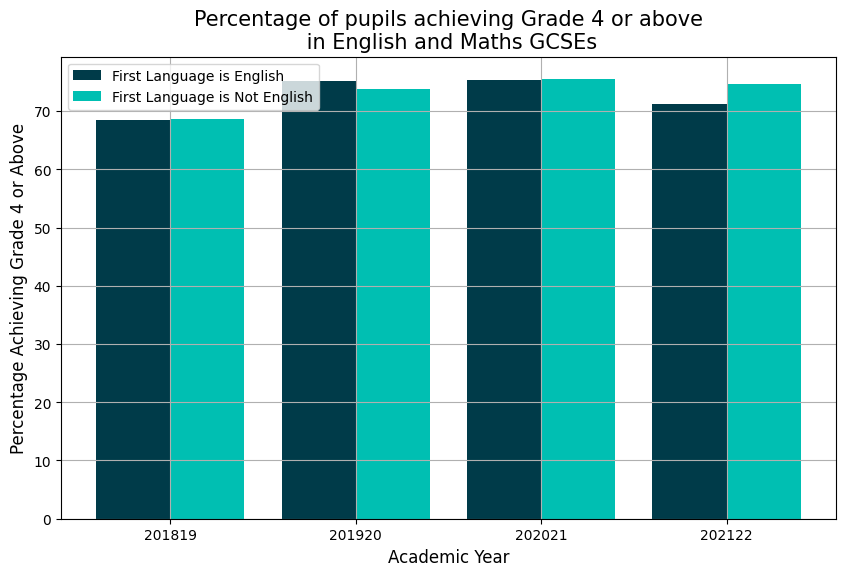

In [61]:
# Start to assign columns to the axes
x_lang = lang_ks4_df['time_period']
y_lang = lang_ks4_df.groupby(['time_period', 'characteristic_first_language'])['pt_l2basics_94'].mean()

# seperate out the two values returned in the first language column
y_lang = y_lang.unstack('characteristic_first_language')
english = y_lang['English']
not_english = y_lang['Other than English']

# Define the custom order of the x-axis labels (otherwise the bars are in the wrong order)
custom_order = [201819, 201920, 202021, 202122]

# Alter the positions on the x-axis based on the custom order
x_positions = np.arange(len(custom_order))

# Set the bar width
bar_width = 0.4

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.xlabel('Academic Year', fontsize=12)
plt.ylabel('Percentage Achieving Grade 4 or Above', fontsize=12)
plt.bar(x_positions, english[custom_order], width=bar_width, label='First Language is English', color=colours_lang[0])
plt.bar(x_positions + bar_width, not_english[custom_order], width=bar_width, label='First Language is Not English', color=colours_lang[1])
plt.xticks(x_positions + bar_width / 2, custom_order)  # Use custom_order for x-axis tick labels
plt.title("Percentage of pupils achieving Grade 4 or above\n in English and Maths GCSEs", fontsize=15)
plt.legend()
plt.grid()
plt.show()


* We can see that the percentage of pupils achieving a pass grade (Grade 4 or above) is very similar between the two groups.
* The pupils whose first language is not English overtook the other group slightly in the most recent year we have data (2021/22). 



> Showing the percentage of pupils who achieved a Grade 5 or above in English and Maths GCSE.



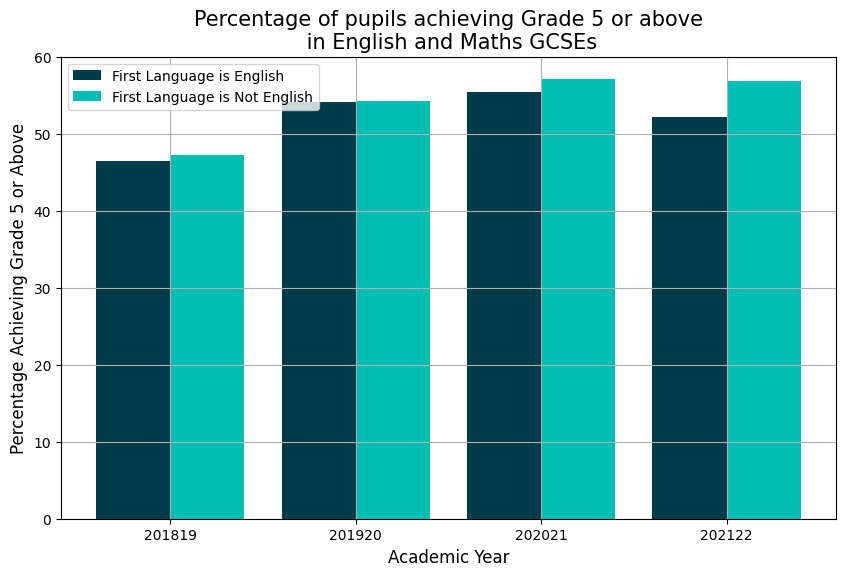

In [62]:
# Start to assign columns to the axes
x_lang = lang_ks4_df['time_period']
y_lang = lang_ks4_df.groupby(['time_period', 'characteristic_first_language'])['pt_l2basics_95'].mean()

# seperate out the two values returned in the first language column
y_lang = y_lang.unstack('characteristic_first_language')
english = y_lang['English']
not_english = y_lang['Other than English']

# Define the custom order of the x-axis labels (otherwise the bars are in the wrong order)
custom_order = [201819, 201920, 202021, 202122]

# Alter the positions on the x-axis based on the custom order
x_positions = np.arange(len(custom_order))

# Set the bar width
bar_width = 0.4

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.xlabel('Academic Year', fontsize=12)
plt.ylabel('Percentage Achieving Grade 5 or Above', fontsize=12)
plt.bar(x_positions, english[custom_order], width=bar_width, label='First Language is English', color=colours_lang[0])
plt.bar(x_positions + bar_width, not_english[custom_order], width=bar_width, label='First Language is Not English', color=colours_lang[1])
plt.xticks(x_positions + bar_width / 2, custom_order)  # Use custom_order for x-axis tick labels
plt.title("Percentage of pupils achieving Grade 5 or above\n in English and Maths GCSEs", fontsize=15)
plt.legend()
plt.grid()
plt.show()

* We can see that there is a more noticable difference in the percentage of pupils achieving a good pass grade (Grade 5 or above) between the two goups compared to the Grade 4 data.
* A higher percentage of the  pupils whose first language is not English achieved the good pass grade over all four years we have data.

### 5.2.3 Summary

*   Our data shows us that the percentage of students achieving grades 4 or above is quite similar acriss the two characteristic groups. This indicates that a girls furst language does not have a significant impact on her ability to pass standard tests at age 15/16.
* However, our analysis of pupils who achiev a 'good pass' (Grade 5 or above) indicates that those whose first language is not English are more likey to achieve this higher standard compared to there peers whose first language is English.
* Coming back to our original research question, we can conclude the a girls first language does not have a significant impact on her ability to achieve a pass grade at age 15/16. However first language does seem to have an impact on teh likelyhood of a girl age 15/16 achieving a higher grade (or good pass). Girls whose first language is not English are shown to be more likely to meet this higher standard.
* We need to do more analysis on the causes of this. Perharps it is tied to parental pressure and social pressures of different groups. Or it could be to do with the fact that those who speak more than one language are liekly to be more experineced in learning, given the fact they have already learned to speak multiple languages.

## 5.3 ETHNICITY- IMPORT AND ANALYSIS (KS4)

### 5.3.1 Importing the Key Stage 4 (ethnicity) csv file

In [63]:
try:
    ethnicity_ks4_df = pd.read_csv('ethnicity_ks4_df.csv')
    print('Sucessfully connected!')
except FileNotFoundError:
    print("File not found. Please check the file path.")



Sucessfully connected!


### 5.3.2 Statistical & Visual Analysis

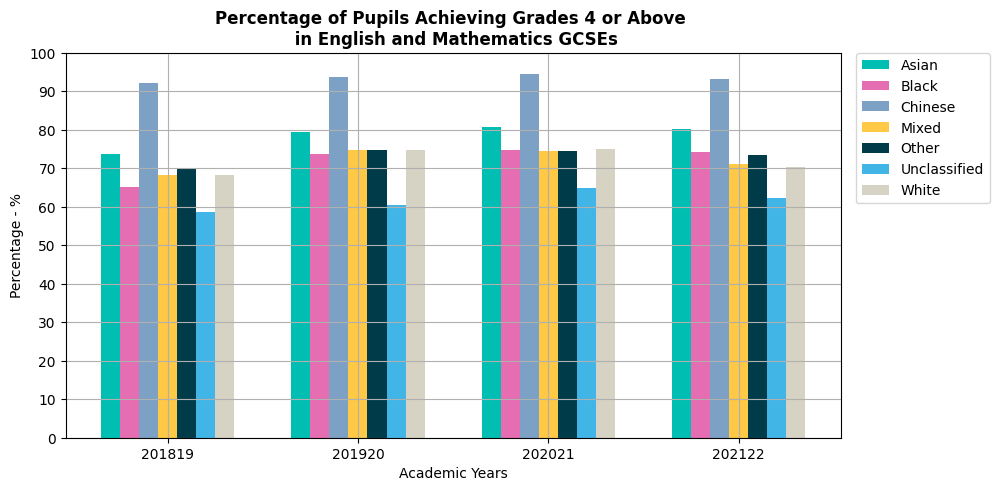

In [64]:
plt.figure(figsize=(10, 5))


new_ethnicity_ks4_df = ethnicity_ks4_df[ethnicity_ks4_df['geographic_level'] == 'National']
x_ks4_new_ethnicity_ks4_df =new_ethnicity_ks4_df['time_period']
y_ks4_new_ethnicity_ks4_df = new_ethnicity_ks4_df.groupby(['time_period', 'characteristic_ethnic_major'])['pt_l2basics_94'].sum()

# separate out the 7 ethnic majors
y_ks4_new_ethnicity_ks4_df = y_ks4_new_ethnicity_ks4_df.unstack('characteristic_ethnic_major')

ethnic_Asian = y_ks4_new_ethnicity_ks4_df['Asian'] 
ethnic_Black = y_ks4_new_ethnicity_ks4_df['Black'] 
ethnic_Chinese = y_ks4_new_ethnicity_ks4_df['Chinese'] 
ethnic_Mixed = y_ks4_new_ethnicity_ks4_df['Mixed'] 
ethnic_Other = y_ks4_new_ethnicity_ks4_df['Other'] 
ethnic_Unclassified = y_ks4_new_ethnicity_ks4_df['Unclassified'] 
ethnic_White = y_ks4_new_ethnicity_ks4_df['White'] 

x_pos_ethnic = np.arange(len(ethnic_Asian))
bar_width = 0.1
plt.bar(x_pos_ethnic, ethnic_Asian, width=bar_width, label='Asian', color = '#00bfb2')
plt.bar(x_pos_ethnic + bar_width, ethnic_Black , width=bar_width, label='Black', color = '#e56db1')
plt.bar(x_pos_ethnic + 2 * bar_width, ethnic_Chinese , width=bar_width, label='Chinese', color = '#7da1c4')
plt.bar(x_pos_ethnic + 3 * bar_width, ethnic_Mixed , width=bar_width, label='Mixed', color = '#ffc845')
plt.bar(x_pos_ethnic + 4 * bar_width, ethnic_Other , width=bar_width, label='Other', color = '#003b49')
plt.bar(x_pos_ethnic + 5 * bar_width, ethnic_Unclassified , width=bar_width, label='Unclassified', color = '#41b6e6')
plt.bar(x_pos_ethnic + 6 * bar_width, ethnic_White , width=bar_width, label='White', color = '#d6d2c4')

plt.xticks(x_pos_ethnic + 3 * bar_width,['201819', '201920', '202021', '202122'])

plt.title('Percentage of Pupils Achieving Grades 4 or Above \n in English and Mathematics GCSEs', weight = 'bold')
plt.xlabel('Academic Years')
plt.ylabel('Percentage - %')
plt.yticks([x for x in range(0, 110, 10)  ])
# place legend outside bar plot so can see the bars
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.grid()
plt.show()


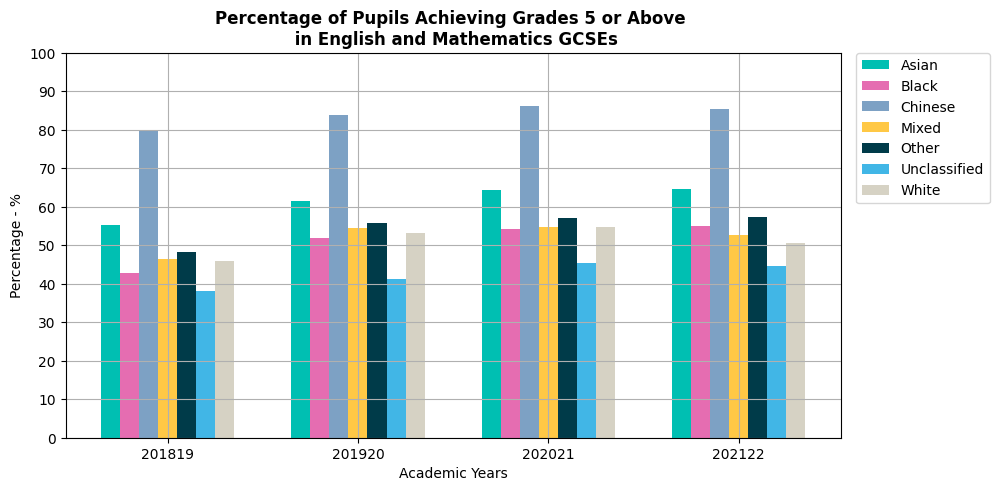

In [65]:
plt.figure(figsize=(10, 5))


new_ethnicity_ks4_df = ethnicity_ks4_df[ethnicity_ks4_df['geographic_level'] == 'National']
x_ks4_new_ethnicity_ks4_df =new_ethnicity_ks4_df['time_period']
y_ks4_new_ethnicity_ks4_df = new_ethnicity_ks4_df.groupby(['time_period', 'characteristic_ethnic_major'])['pt_l2basics_95'].sum()

# separate out the 7 ethnic majors
y_ks4_new_ethnicity_ks4_df = y_ks4_new_ethnicity_ks4_df.unstack('characteristic_ethnic_major')

ethnic_Asian = y_ks4_new_ethnicity_ks4_df['Asian'] 
ethnic_Black = y_ks4_new_ethnicity_ks4_df['Black'] 
ethnic_Chinese = y_ks4_new_ethnicity_ks4_df['Chinese'] 
ethnic_Mixed = y_ks4_new_ethnicity_ks4_df['Mixed'] 
ethnic_Other = y_ks4_new_ethnicity_ks4_df['Other'] 
ethnic_Unclassified = y_ks4_new_ethnicity_ks4_df['Unclassified'] 
ethnic_White = y_ks4_new_ethnicity_ks4_df['White'] 

x_pos_ethnic = np.arange(len(ethnic_Asian))
bar_width = 0.1
plt.bar(x_pos_ethnic, ethnic_Asian, width=bar_width, label='Asian', color = '#00bfb2')
plt.bar(x_pos_ethnic + bar_width, ethnic_Black , width=bar_width, label='Black', color = '#e56db1')
plt.bar(x_pos_ethnic + 2 * bar_width, ethnic_Chinese , width=bar_width, label='Chinese', color = '#7da1c4')
plt.bar(x_pos_ethnic + 3 * bar_width, ethnic_Mixed , width=bar_width, label='Mixed', color = '#ffc845')
plt.bar(x_pos_ethnic + 4 * bar_width, ethnic_Other , width=bar_width, label='Other', color = '#003b49')
plt.bar(x_pos_ethnic + 5 * bar_width, ethnic_Unclassified , width=bar_width, label='Unclassified', color = '#41b6e6')
plt.bar(x_pos_ethnic + 6 * bar_width, ethnic_White , width=bar_width, label='White', color = '#d6d2c4')

plt.xticks(x_pos_ethnic + 3 * bar_width,['201819', '201920', '202021', '202122'])

plt.title('Percentage of Pupils Achieving Grades 5 or Above \n in English and Mathematics GCSEs', weight = 'bold')
plt.xlabel('Academic Years')
plt.ylabel('Percentage - %')
plt.yticks([x for x in range(0, 110, 10)  ])
plt.grid()
# place legend outside bar plot so can see the bars
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

### 5.3.3 Summary

*   Our data shows us that the percentage of students achieving grades 4 or above varies across the seven ethnic major. Chinese pupils are consistently more likely to achieve grade 4 or above compared to other ethnic majors. This indicates that a girl's ethnic major does have an impact on her ability to pass standard tests at age 15/16.
* This trend continues and becomes more pronounced in our analysis of pupils who achieve a 'good pass' (Grade 5 or above) which indicates that pupils with Chinese ethnic majors are significantly more likely to achieve this higher standard across all the time periods compared to their peers.
* In KS4 English and Mathematics, the gap between Chinese pupils and Unclassified pupils increases significantly between grade 4 achievement and grade 5 achievement. With a difference in grade 4 of approximately 20% and in grade 5 and above of nearly 40%.
* Coming back to our original research question, we can conclude that a girl's ethnic major does have a significant impact on her ability to achieve a pass grade at age 15/16, especially for a good pass.
* We need to do more analysis on the causes of this. Perhaps it is tied to parental pressure and the cultural values of the different ethnic groups.

# **6. JOINING DATAFRAMES**



## 6.1 Statistical & Visual Analysis

Joining the dataframes ks2 year 2016-17 and ks4 year 2021-22 to show the same pupils progressing

* The percentage achieving expected standard in English and Maths as both are measured in each dataframe.
* We are comparing the percentage of pupils who achieved 'expected standard' at key stage 2 and the percentage of pupils who achieve a Grade 4 (pass) at key stage 4.
* Of course, these measures are not directly comparable, but it does provide a rough approximation of the percentage of students achieving as expected.

In [66]:
join_fsm_ks2_df = fsm_ks2_df[fsm_ks2_df['time_period']==201617]
join_fsm_ks4_df = fsm_ks4_df[(fsm_ks4_df['time_period'] == 202122) & (fsm_ks4_df['geographic_level'] == 'National')]


In [67]:
# Joining the key stage 2 dataframe where the year is 2016-17 and the key stage 4 dataframe where year is 2021-22

# Renaming the values in join_fsm_ks2_df so they match the key stage 4 values
join_fsm_ks2_df.loc[join_fsm_ks2_df['characteristic'] == 'FSM eligible', 'characteristic'] = 'FSM'
join_fsm_ks2_df.loc[join_fsm_ks2_df['characteristic'] == 'Not known to be FSM eligible', 'characteristic'] = 'FSM all other'

# Joining the dataframes
joined_fsm_df = pd.merge(join_fsm_ks2_df, join_fsm_ks4_df, left_on='characteristic', right_on='characteristic_free_school_meals')

# Print the joined dataframe
joined_fsm_df.head()


,time_period_x,characteristic_group,characteristic,gender,no_schools,t_rwm_eligible_pupils,t_rwm_met_expected_standard,t_rwm_met_higher_standard,t_read_eligible_pupils,t_read_met_expected_standard,...,t_l2basics_94,pt_l2basics_94,t_ebacc_e_ptq_ee,pt_ebacc_e_ptq_ee,t_ebacc_95,pt_ebacc_95,t_ebacc_94,pt_ebacc_94,t_ebaccaps,avg_ebaccaps
0,201617,Free school meal status,FSM,Girls,11560.0,44584.0,20997.0,1464.0,44657.0,26538.0,...,29648.0,49.9,18174.0,30.6,6581.0,11.1,9953.0,16.8,198331.58,3.34
1,201617,Free school meal status,FSM all other,Girls,15371.0,248575.0,169610.0,28397.0,248728.0,193309.0,...,175584.0,77.4,107394.0,47.4,62908.0,27.7,80898.0,35.7,1090721.36,4.81


* The key stage 2 scores are split down into subjects, wheras the key stage 4 scores are the percentage passing english and maths.
* To allow us to compare the two values we have made a new column which is the average of pupils meeting the expected standard in Maths, Reading and Grammar, Spelling and Punctuation at Key Stage 2.
* We accept this is a very crude measure, but it gives us an rough idea of the trends.

In [68]:
# Calculate the average and assign it to a new column
joined_fsm_df['average_percentage'] = joined_fsm_df[['maths_percentage', 'science_percentage', 'reading_percentage', 'grammar_percentage']].mean(axis=1)


In [69]:
# Group by 'characteristics' and the percentage passing(or achieving expected standard) at key stage 2 and 4
joined_fsm_df = joined_fsm_df.groupby('characteristic')[['average_percentage', 'pt_l2basics_94']].mean()

joined_fsm_df.head()

,average_percentage,pt_l2basics_94
characteristic,,
FSM,64.311908,49.9
FSM all other,81.479407,77.4


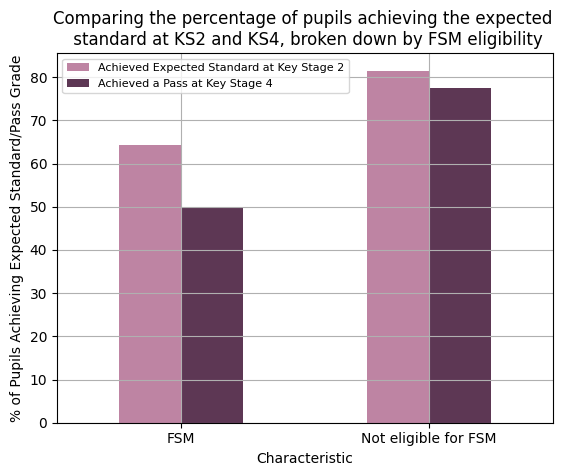

In [70]:
# Plot the grouped dataframe on a bar chart
joined_fsm_df.plot(kind='bar', color=['#be84a3','#5d3754'])

# Set the labels and title
plt.xlabel('Characteristic')
plt.ylabel('% of Pupils Achieving Expected Standard/Pass Grade')
plt.title('Comparing the percentage of pupils achieving the expected \n standard at KS2 and KS4, broken down by FSM eligibility')
legend_labels = ['Achieved Expected Standard at Key Stage 2', 'Achieved a Pass at Key Stage 4']
plt.xticks([0,1],['FSM','Not eligible for FSM'], rotation=0)
plt.legend(legend_labels, fontsize=8)
plt.grid()
# Display the chart
plt.show()

## 6.2 Summary

Analysis of the progess of the year group who took GCSEs in 2021/22
* Pupils who took GCSEs in 2021/22 also took Key Stage 2 SATs in 2016/17.
* We have filtered the fsm key stage 2 and key stage 4 dataframes to these years and then joined these two dataframes.
* By doing this we were aiming to review how the same group of girls progess through their school career.
* We can see that a lower percentage of both groups achieve the expected stanadrd at key stage 4 compared to key stage 2. This could be because the assement is more difficult.
* Importantly, for our original question, we can see that, on average, girls who receieve FSM experience a larger decrease in performance between key stage 2 and key stage 4.
* We can infer from this that the impact of recieving FSMs gets stronger as a girl gets older.